EDA

Single table analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

balance_sheet = pd.read_csv('/Users/iveshe/Desktop/Data_Visualization/Combined_Consolidated_Balance_Sheet.csv')
cash_flows = pd.read_csv('/Users/iveshe/Desktop/Data_Visualization/Combined_Consolidated_Statement_of_Cash_Flows.csv')
comprehensive_income = pd.read_csv('/Users/iveshe/Desktop/Data_Visualization/Combined_Consolidated_Statement_of_Comprehensive_Income.csv')
statement_of_income = pd.read_csv('/Users/iveshe/Desktop/Data_Visualization/Combined_Consolidated_Statement_of_Income.csv')
shareholders_equity = pd.read_csv('/Users/iveshe/Desktop/Data_Visualization/Combined_Consolidated_Statement_of_Shareholders_Equity.csv')

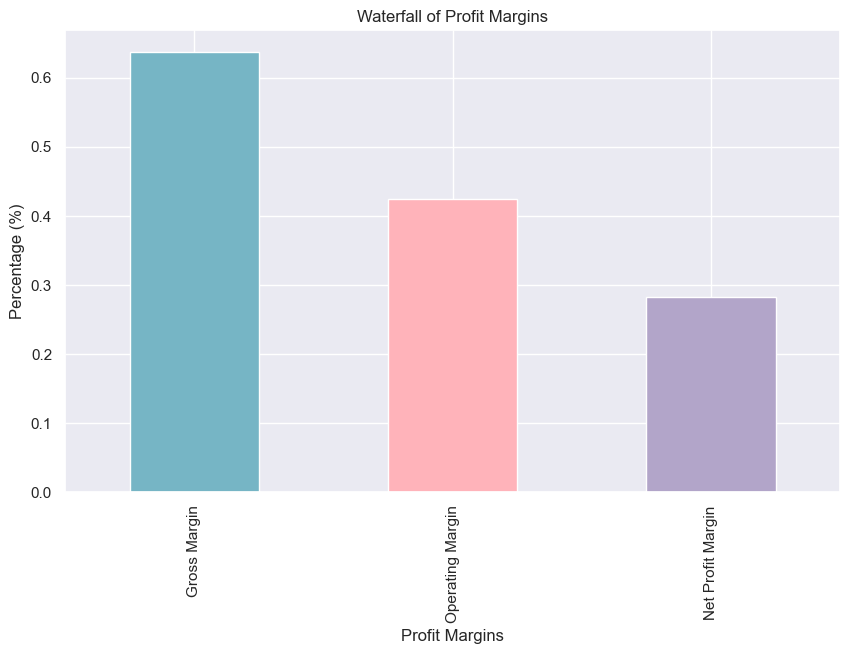

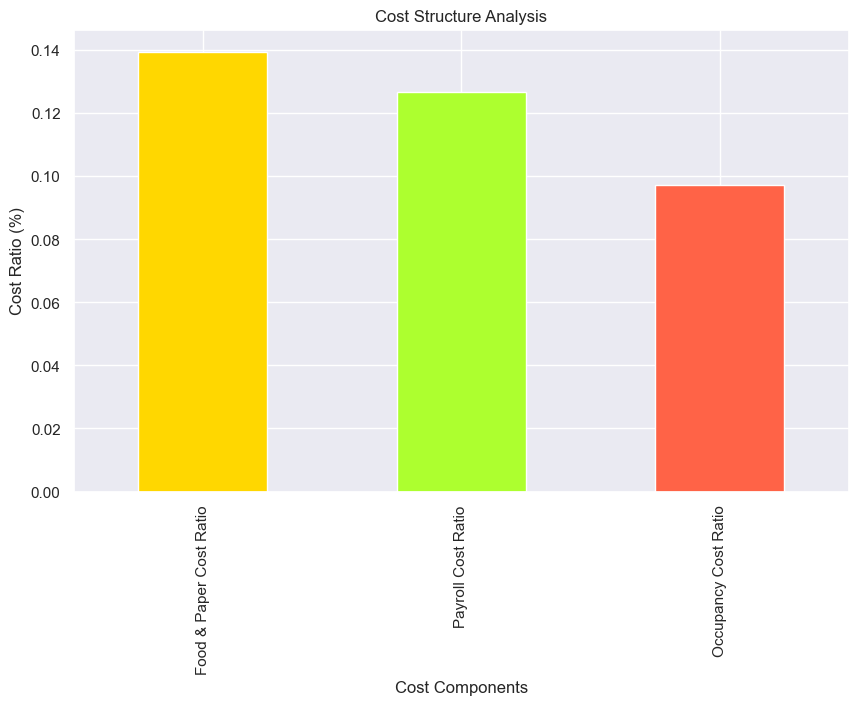

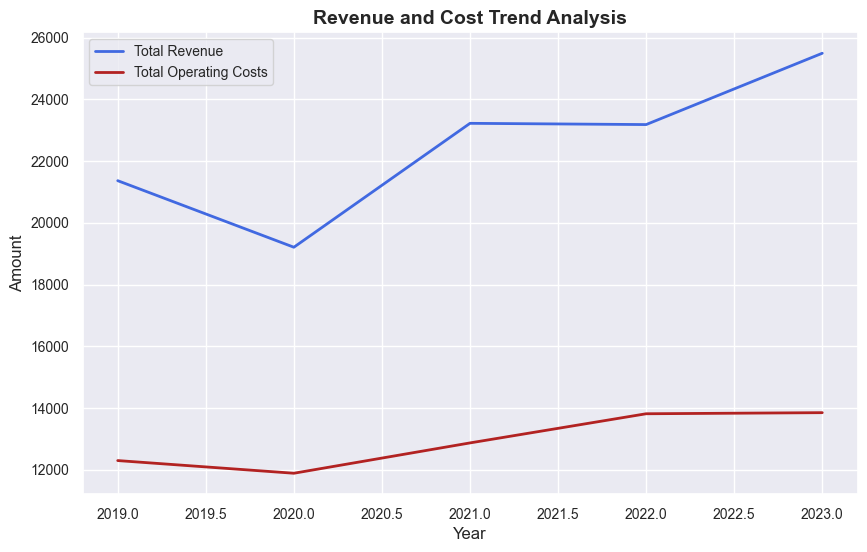

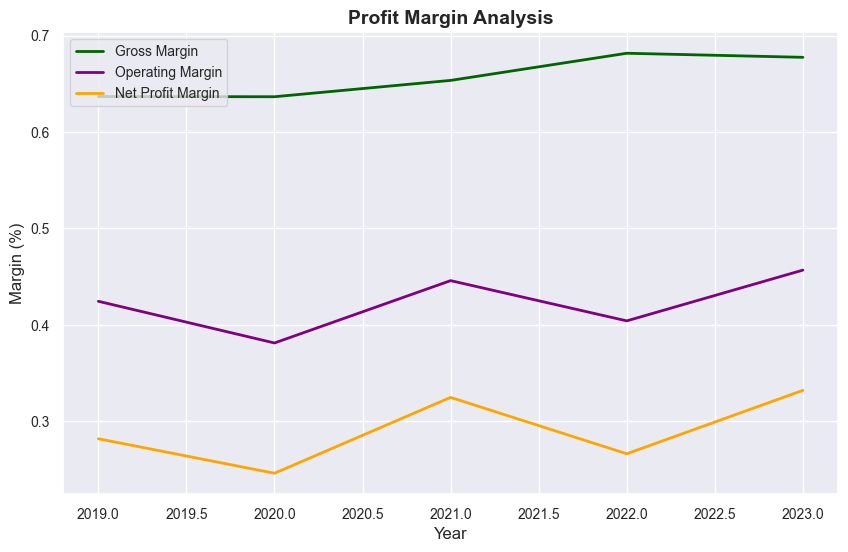

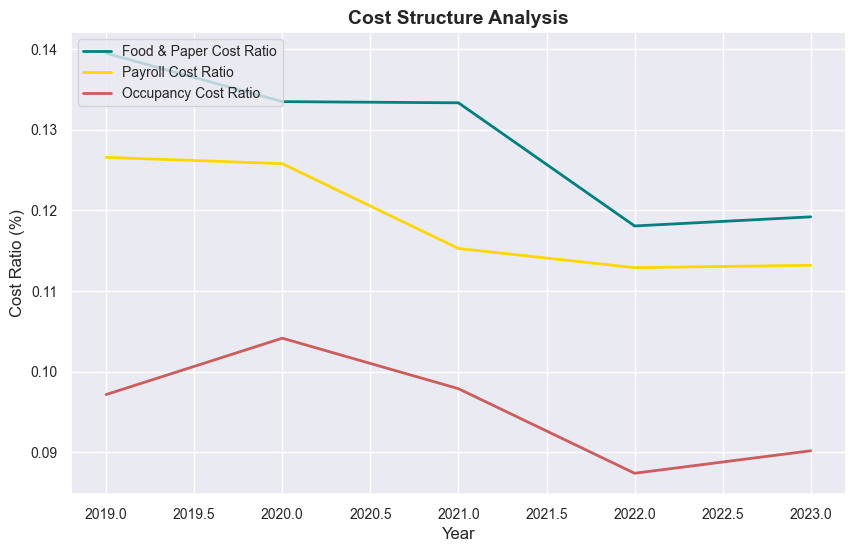

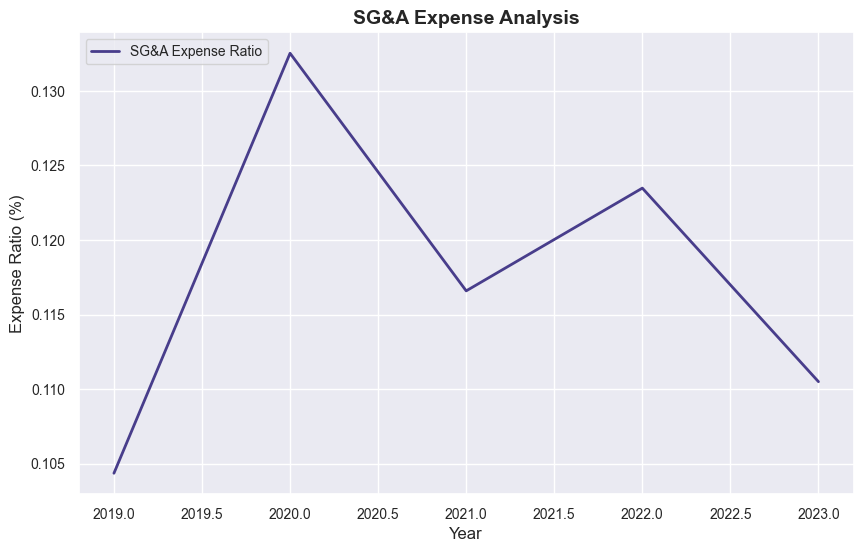

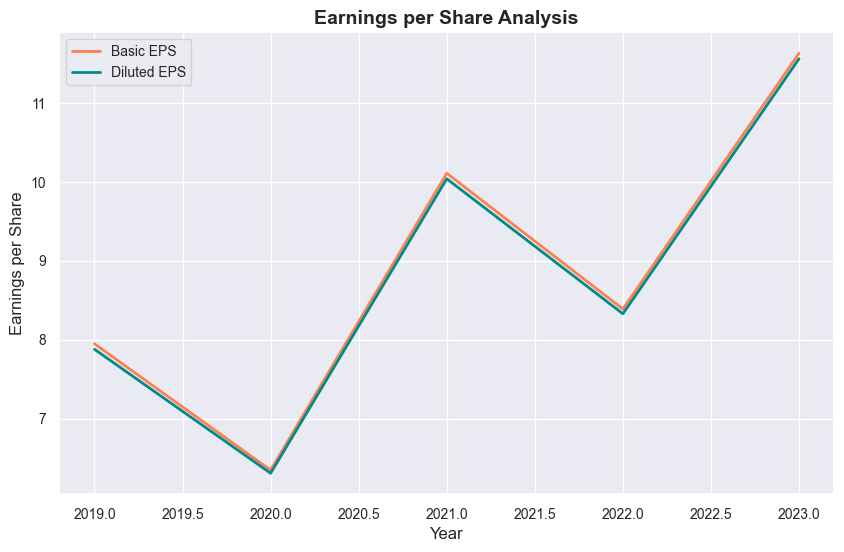

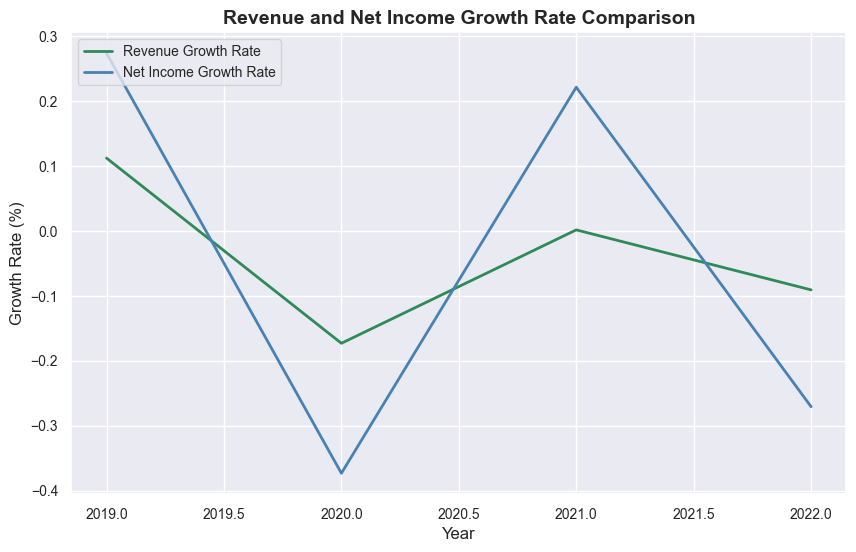

,Year,Total revenues,Total operating costs and expenses,Revenue Growth Rate,Cost Growth Rate,Gross Margin,Operating Margin,Net Profit Margin,Food & Paper Cost Ratio,Payroll Cost Ratio,Occupancy Cost Ratio,SG&A Expense Ratio,Basic EPS,Diluted EPS,Net Income Growth Rate
0,2023,25493.7,13847.0,NaN,NaN,0.677407,0.456846,0.332192,0.119206,0.113197,0.090191,0.110494,11.63,11.56,NaN
1,2022,23182.6,13811.6,-0.090654,-0.002557,0.681619,0.404226,0.266467,0.118076,0.112904,0.087402,0.123481,8.39,8.33,-0.270570
2,2021,23222.9,12866.9,0.001738,-0.068399,0.653476,0.445939,0.324903,0.133351,0.115283,0.097890,0.116588,10.11,10.04,0.221420
3,2020,19207.8,11883.8,-0.172894,-0.076405,0.636543,0.381303,0.246280,0.133498,0.125803,0.104156,0.132529,6.35,6.31,-0.373045
4,2019,21364.4,12294.6,0.112277,0.034568,0.636751,0.424529,0.282030,0.139498,0.126584,0.097166,0.104351,7.95,7.88,0.273734


In [2]:
# Revenue and Cost Growth Rate
statement_of_income['Revenue Growth Rate'] = statement_of_income['Total revenues'].pct_change()
statement_of_income['Cost Growth Rate'] = statement_of_income['Total operating costs and expenses'].pct_change()

# Gross Margin, Operating Margin, and Net Profit Margin
statement_of_income['Gross Margin'] = (
    (statement_of_income['Total revenues'] - statement_of_income['Company-operated restaurant expenses - Food & paper'] -
     statement_of_income['Company-operated restaurant expenses - Payroll & employee benefits'] -
     statement_of_income['Company-operated restaurant expenses - Occupancy & other operating expenses']) / 
    statement_of_income['Total revenues']
)
statement_of_income['Operating Margin'] = statement_of_income['Operating income'] / statement_of_income['Total revenues']
statement_of_income['Net Profit Margin'] = statement_of_income['Net income'] / statement_of_income['Total revenues']

# Cost Structure Ratios
statement_of_income['Food & Paper Cost Ratio'] = statement_of_income['Company-operated restaurant expenses - Food & paper'] / statement_of_income['Total revenues']
statement_of_income['Payroll Cost Ratio'] = statement_of_income['Company-operated restaurant expenses - Payroll & employee benefits'] / statement_of_income['Total revenues']
statement_of_income['Occupancy Cost Ratio'] = statement_of_income['Company-operated restaurant expenses - Occupancy & other operating expenses'] / statement_of_income['Total revenues']

# SG&A Expense Ratio
statement_of_income['SG&A Expense Ratio'] = (
    statement_of_income['Selling, general & administrative expenses - Depreciation and amortization'] + 
    statement_of_income['Selling, general & administrative expenses - Other']
) / statement_of_income['Total revenues']

# EPS (Earnings per Share)
statement_of_income['Basic EPS'] = statement_of_income['Earnings per common share–basic']
statement_of_income['Diluted EPS'] = statement_of_income['Earnings per common share–diluted']

# Net Income Growth Rate
statement_of_income['Net Income Growth Rate'] = statement_of_income['Net income'].pct_change()

# Waterfall Chart for Profit Margins
profit_margins = statement_of_income[['Gross Margin', 'Operating Margin', 'Net Profit Margin']].iloc[-1]
fig, ax = plt.subplots(figsize=(10, 6))
profit_margins.plot(kind="bar", color=['#76b5c5', '#ffb3ba', '#b2a5c9'], ax=ax)
plt.xlabel('Profit Margins')
plt.ylabel('Percentage (%)')
plt.title('Waterfall of Profit Margins')
plt.show()

# Bar Chart for Cost Ratios
cost_ratios = statement_of_income[['Food & Paper Cost Ratio', 'Payroll Cost Ratio', 'Occupancy Cost Ratio']].iloc[-1]
fig, ax = plt.subplots(figsize=(10, 6))
cost_ratios.plot(kind="bar", color=['#FFD700', '#ADFF2F', '#FF6347'], ax=ax)
plt.xlabel('Cost Components')
plt.ylabel('Cost Ratio (%)')
plt.title('Cost Structure Analysis')
plt.show()

# Additional Trend Analysis Visualizations

# Revenue and Cost Trend Analysis
plt.figure(figsize=(10, 6))
plt.plot(statement_of_income['Year'], statement_of_income['Total revenues'], label='Total Revenue', color='royalblue', linewidth=2)
plt.plot(statement_of_income['Year'], statement_of_income['Total operating costs and expenses'], label='Total Operating Costs', color='firebrick', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Revenue and Cost Trend Analysis', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Profit Margin Analysis
plt.figure(figsize=(10, 6))
plt.plot(statement_of_income['Year'], statement_of_income['Gross Margin'], label='Gross Margin', color='darkgreen', linewidth=2)
plt.plot(statement_of_income['Year'], statement_of_income['Operating Margin'], label='Operating Margin', color='purple', linewidth=2)
plt.plot(statement_of_income['Year'], statement_of_income['Net Profit Margin'], label='Net Profit Margin', color='orange', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Margin (%)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Profit Margin Analysis', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Cost Structure Analysis
plt.figure(figsize=(10, 6))
plt.plot(statement_of_income['Year'], statement_of_income['Food & Paper Cost Ratio'], label='Food & Paper Cost Ratio', color='teal', linewidth=2)
plt.plot(statement_of_income['Year'], statement_of_income['Payroll Cost Ratio'], label='Payroll Cost Ratio', color='gold', linewidth=2)
plt.plot(statement_of_income['Year'], statement_of_income['Occupancy Cost Ratio'], label='Occupancy Cost Ratio', color='indianred', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cost Ratio (%)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Cost Structure Analysis', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# SG&A Expense Analysis
plt.figure(figsize=(10, 6))
plt.plot(statement_of_income['Year'], statement_of_income['SG&A Expense Ratio'], label='SG&A Expense Ratio', color='darkslateblue', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Expense Ratio (%)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('SG&A Expense Analysis', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Earnings per Share Analysis
plt.figure(figsize=(10, 6))
plt.plot(statement_of_income['Year'], statement_of_income['Basic EPS'], label='Basic EPS', color='coral', linewidth=2)
plt.plot(statement_of_income['Year'], statement_of_income['Diluted EPS'], label='Diluted EPS', color='darkcyan', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Earnings per Share', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Earnings per Share Analysis', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Revenue and Net Income Growth Rate Comparison
plt.figure(figsize=(10, 6))
plt.plot(statement_of_income['Year'], statement_of_income['Revenue Growth Rate'], label='Revenue Growth Rate', color='seagreen', linewidth=2)
plt.plot(statement_of_income['Year'], statement_of_income['Net Income Growth Rate'], label='Net Income Growth Rate', color='steelblue', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Revenue and Net Income Growth Rate Comparison', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Display relevant columns for reference
statement_of_income[
    ['Year', 'Total revenues', 'Total operating costs and expenses', 
     'Revenue Growth Rate', 'Cost Growth Rate', 
     'Gross Margin', 'Operating Margin', 'Net Profit Margin', 
     'Food & Paper Cost Ratio', 'Payroll Cost Ratio', 'Occupancy Cost Ratio', 
     'SG&A Expense Ratio', 'Basic EPS', 'Diluted EPS', 'Net Income Growth Rate']
]


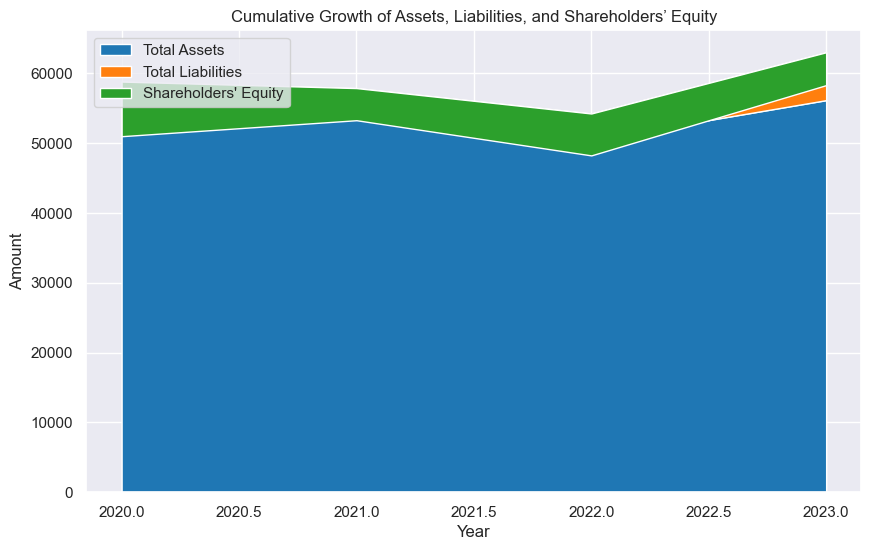

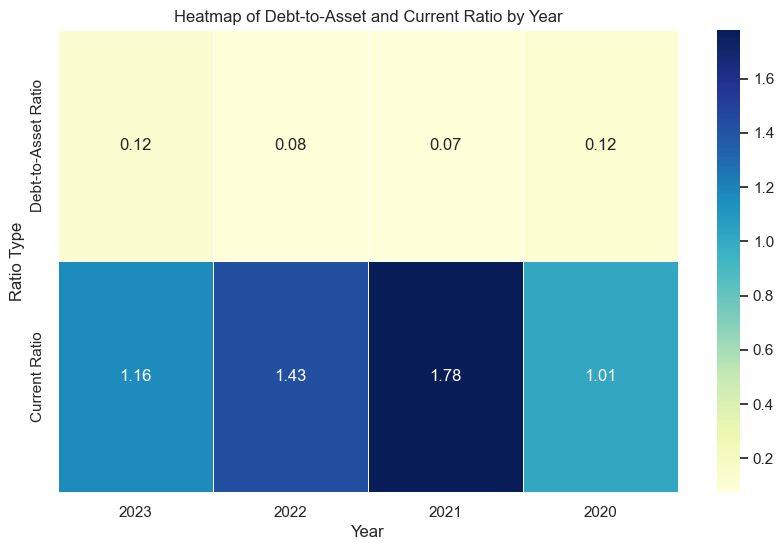

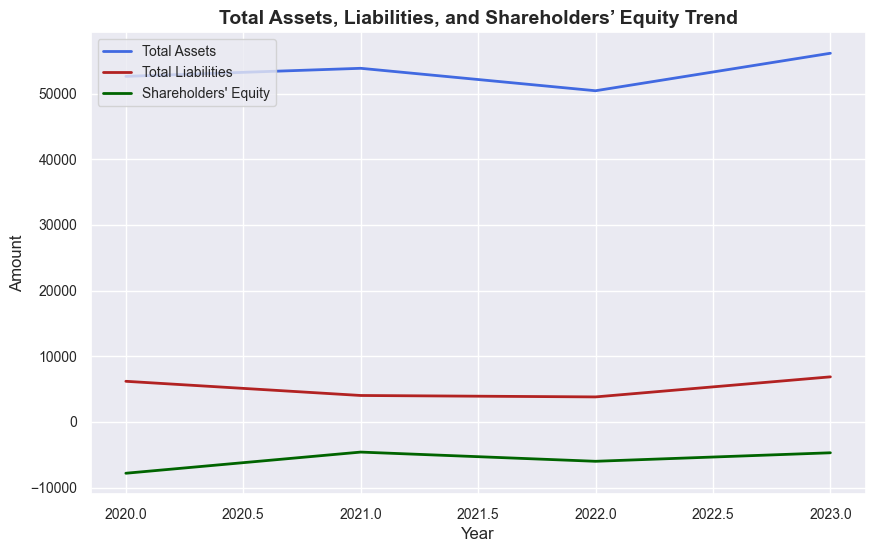

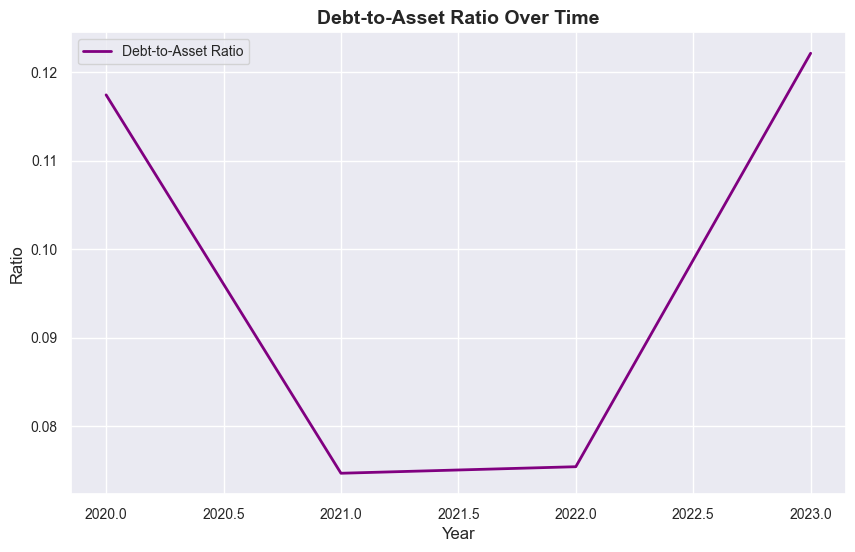

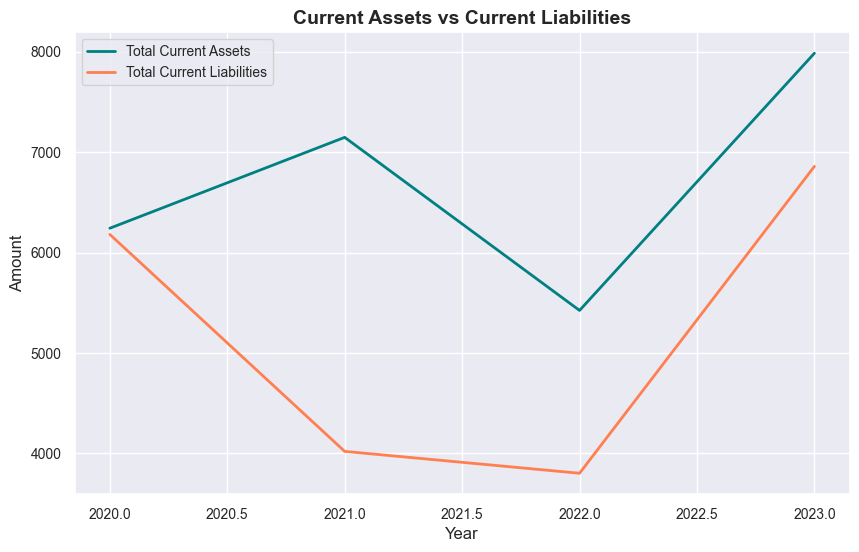

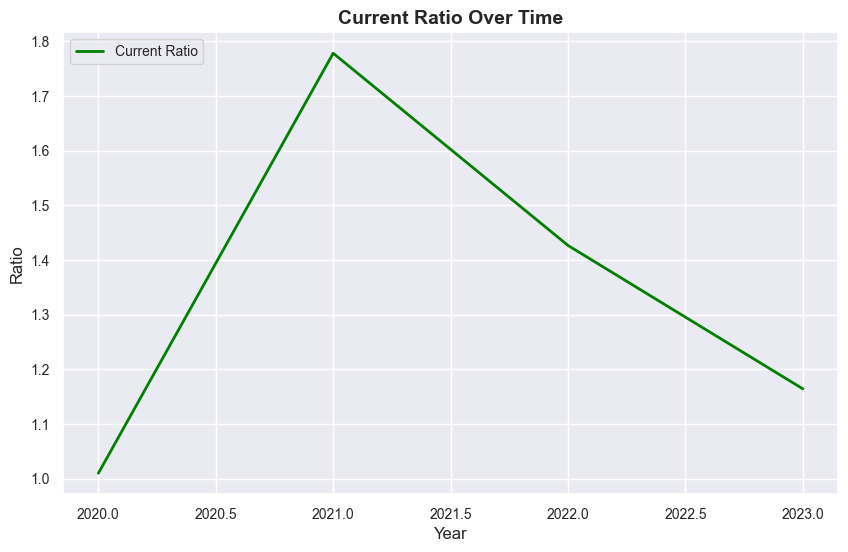

,Year,Total assets,Total current liabilities,Total shareholders’ equity (deficit),Debt-to-Asset Ratio,Current Ratio
0,2023,56146.8,6859.0,-4706.7,0.122162,1.164368
1,2022,50435.6,3802.1,-6003.4,0.075385,1.426633
2,2021,53854.3,4020.0,-4601.0,0.074646,1.778234
3,2020,52626.8,6181.2,-7824.9,0.117453,1.010030


In [3]:
# Step 1: Calculate Debt-to-Asset Ratio
balance_sheet['Debt-to-Asset Ratio'] = balance_sheet['Total current liabilities'] / balance_sheet['Total assets']

# Cumulative Growth Curve for Total Assets, Total Liabilities, and Shareholders' Equity
plt.figure(figsize=(10, 6))
plt.stackplot(balance_sheet['Year'], 
              balance_sheet['Total assets'], 
              balance_sheet['Total current liabilities'], 
              balance_sheet["Total shareholders’ equity (deficit)"], 
              labels=['Total Assets', 'Total Liabilities', "Shareholders' Equity"], 
              colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Cumulative Growth of Assets, Liabilities, and Shareholders’ Equity')
plt.legend(loc='upper left')
plt.show()

# Calculate Current Ratio
balance_sheet['Current Ratio'] = balance_sheet['Total current assets'] / balance_sheet['Total current liabilities']

ratios = balance_sheet[['Year', 'Debt-to-Asset Ratio', 'Current Ratio']].set_index('Year')
plt.figure(figsize=(10, 6))
sns.heatmap(ratios.T, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Debt-to-Asset and Current Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Ratio Type')
plt.show()

# Plot Total Assets, Total Liabilities, and Shareholders' Equity Over Time
plt.figure(figsize=(10, 6))
plt.plot(balance_sheet['Year'], balance_sheet['Total assets'], label='Total Assets', color='royalblue', linewidth=2)
plt.plot(balance_sheet['Year'], balance_sheet['Total current liabilities'], label='Total Liabilities', color='firebrick', linewidth=2)
plt.plot(balance_sheet['Year'], balance_sheet["Total shareholders’ equity (deficit)"], label="Shareholders' Equity", color='darkgreen', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Total Assets, Liabilities, and Shareholders’ Equity Trend', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Plot Debt-to-Asset Ratio Over Time
plt.figure(figsize=(10, 6))
plt.plot(balance_sheet['Year'], balance_sheet['Debt-to-Asset Ratio'], label='Debt-to-Asset Ratio', color='purple', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Debt-to-Asset Ratio Over Time', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Current Assets vs Current Liabilities for Short-Term Liquidity
plt.figure(figsize=(10, 6))
plt.plot(balance_sheet['Year'], balance_sheet['Total current assets'], label='Total Current Assets', color='teal', linewidth=2)
plt.plot(balance_sheet['Year'], balance_sheet['Total current liabilities'], label='Total Current Liabilities', color='coral', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Current Assets vs Current Liabilities', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Current Ratio Trend Analysis
plt.figure(figsize=(10, 6))
plt.plot(balance_sheet['Year'], balance_sheet['Current Ratio'], label='Current Ratio', color='green', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Current Ratio Over Time', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Display relevant columns for reference
balance_sheet[['Year', 'Total assets', 'Total current liabilities', 'Total shareholders’ equity (deficit)', 'Debt-to-Asset Ratio', 'Current Ratio']]


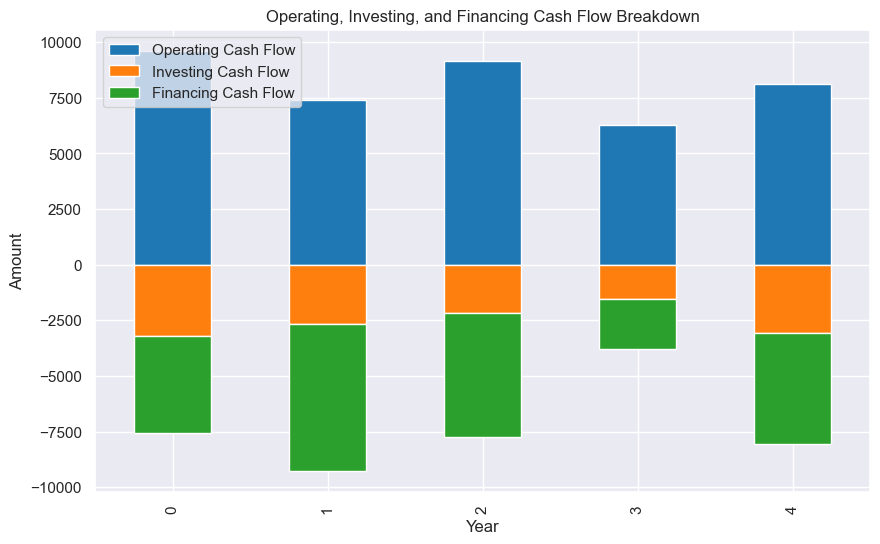

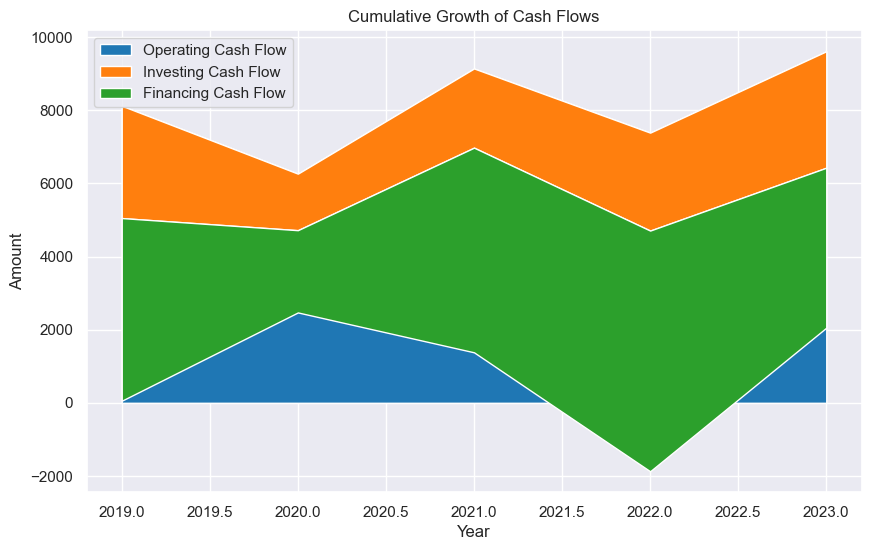

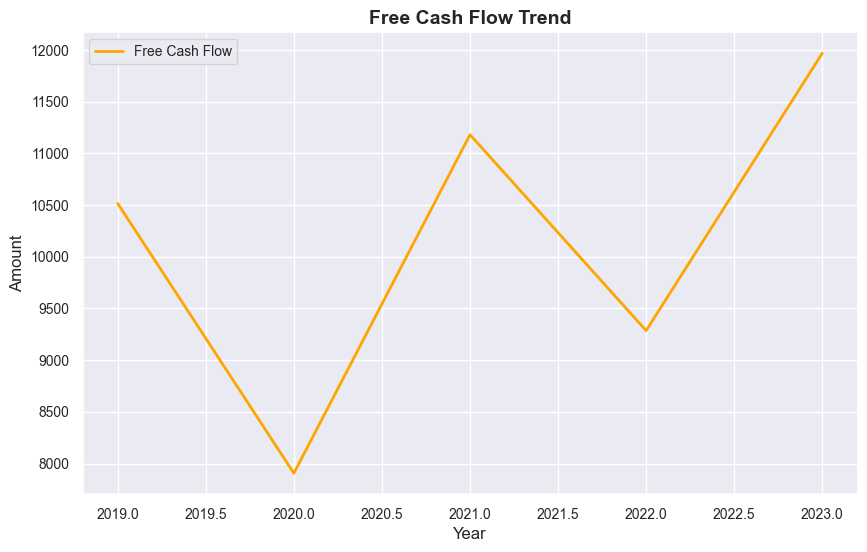

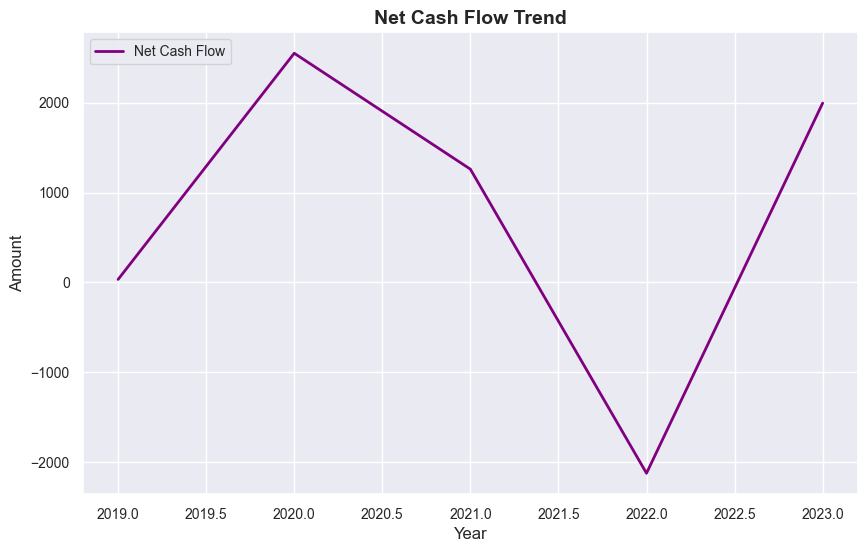

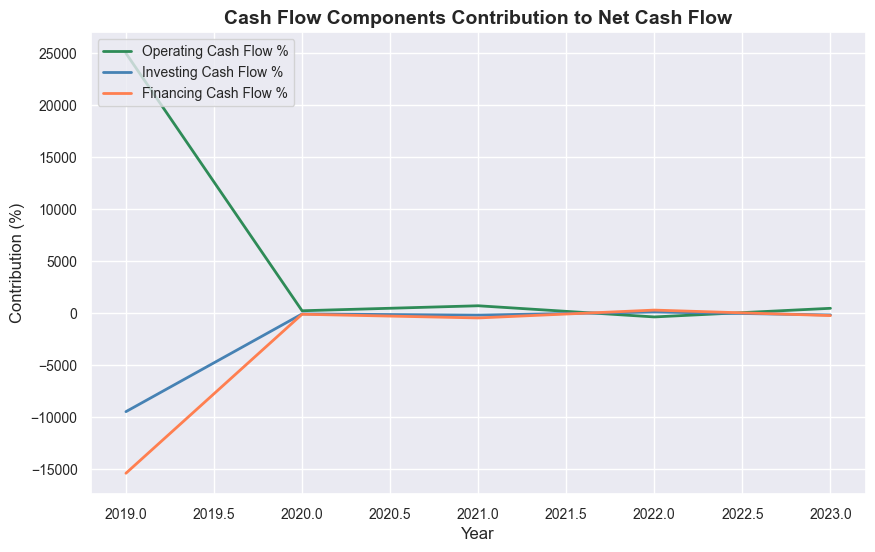

,Year,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Free Cash Flow,Net Cash Flow,Operating CF %,Investing CF %,Financing CF %
0,2023,9611.9,-3184.5,-4374.1,11969.3,1995.5,481.678777,-159.584064,-219.198196
1,2022,7386.7,-2678.1,-6580.2,9285.9,-2125.4,-347.543992,126.004517,309.598193
2,2021,9141.5,-2165.7,-5595.6,11181.5,1260.1,725.458297,-171.867312,-444.059995
3,2020,6265.2,-1545.8,-2249.0,7906.0,2550.6,245.636321,-60.605348,-88.175331
4,2019,8122.1,-3071.1,-4994.8,10515.8,32.5,24991.076923,-9449.538462,-15368.615385


In [4]:
cash_flows.rename(columns={
    'Cash provided by operations': 'Operating Cash Flow',
    'Cash used for investing activities': 'Investing Cash Flow',
    'Cash used for financing activities': 'Financing Cash Flow'
}, inplace=True)

# Stacked Bar Chart for Operating, Investing, and Financing Cash Flow
cash_flows[['Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow']].plot(kind="bar", stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Operating, Investing, and Financing Cash Flow Breakdown')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(loc='upper left')
plt.show()

# Cumulative Growth Curve for Different Cash Flows
plt.figure(figsize=(10, 6))
plt.stackplot(cash_flows['Year'], 
              cash_flows['Operating Cash Flow'], 
              cash_flows['Investing Cash Flow'], 
              cash_flows['Financing Cash Flow'], 
              labels=['Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow'], 
              colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(loc='upper left')
plt.title('Cumulative Growth of Cash Flows')
plt.show()

#Free Cash Flow (FCF) Calculation and Analysis
cash_flows['Free Cash Flow'] = cash_flows['Operating Cash Flow'] - cash_flows['Capital expenditures']

# Line Plot for Free Cash Flow
plt.figure(figsize=(10, 6))
plt.plot(cash_flows['Year'], cash_flows['Free Cash Flow'], label='Free Cash Flow', color='orange', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Free Cash Flow Trend', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Step 3: Net Cash Flow Analysis
cash_flows['Net Cash Flow'] = cash_flows['Cash and equivalents increase (decrease)']

# Line Plot for Net Cash Flow
plt.figure(figsize=(10, 6))
plt.plot(cash_flows['Year'], cash_flows['Net Cash Flow'], label='Net Cash Flow', color='purple', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Net Cash Flow Trend', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Step 4: Cash Flow Components' Contribution Analysis
# Calculate the percentage contribution of each component
cash_flows['Operating CF %'] = (cash_flows['Operating Cash Flow'] / cash_flows['Net Cash Flow']).fillna(0) * 100
cash_flows['Investing CF %'] = (cash_flows['Investing Cash Flow'] / cash_flows['Net Cash Flow']).fillna(0) * 100
cash_flows['Financing CF %'] = (cash_flows['Financing Cash Flow'] / cash_flows['Net Cash Flow']).fillna(0) * 100

# Line Plot for Cash Flow Contribution Percentages
plt.figure(figsize=(10, 6))
plt.plot(cash_flows['Year'], cash_flows['Operating CF %'], label='Operating Cash Flow %', color='seagreen', linewidth=2)
plt.plot(cash_flows['Year'], cash_flows['Investing CF %'], label='Investing Cash Flow %', color='steelblue', linewidth=2)
plt.plot(cash_flows['Year'], cash_flows['Financing CF %'], label='Financing Cash Flow %', color='coral', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Contribution (%)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Cash Flow Components Contribution to Net Cash Flow', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Display relevant columns for reference
cash_flows[['Year', 'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow', 'Free Cash Flow', 'Net Cash Flow', 
           'Operating CF %', 'Investing CF %', 'Financing CF %']]


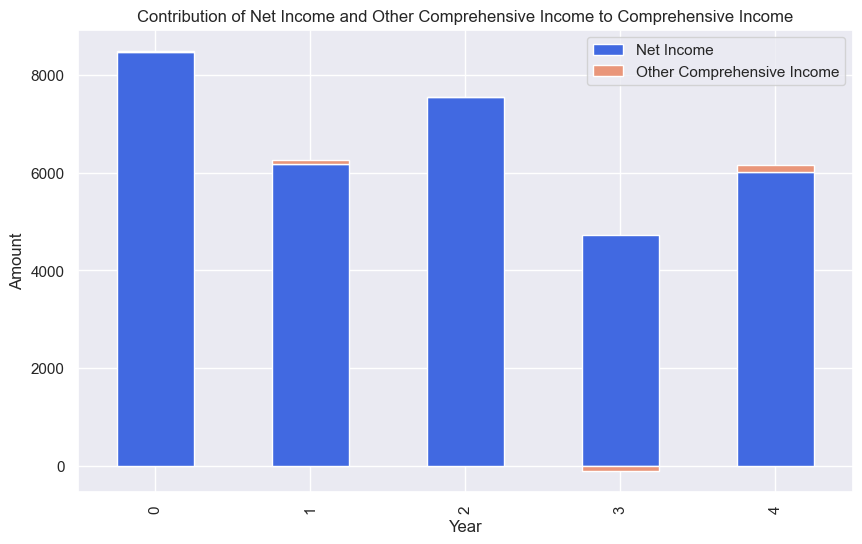

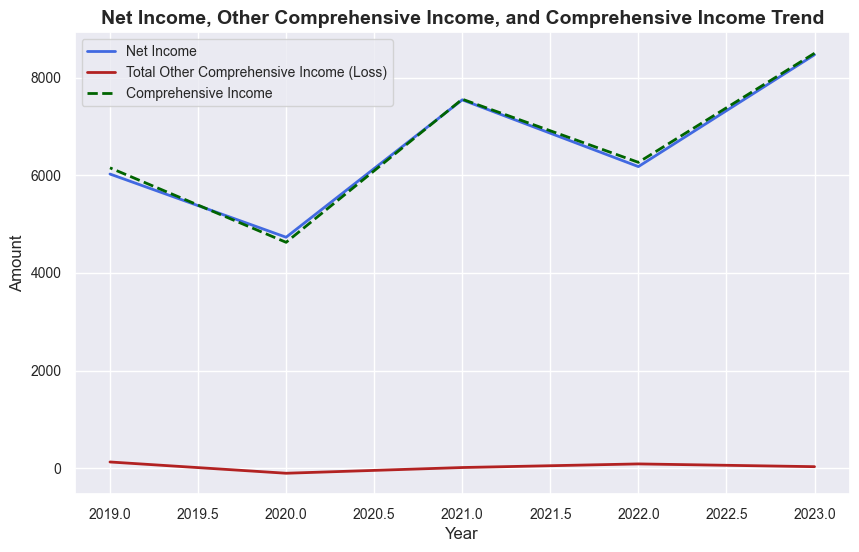

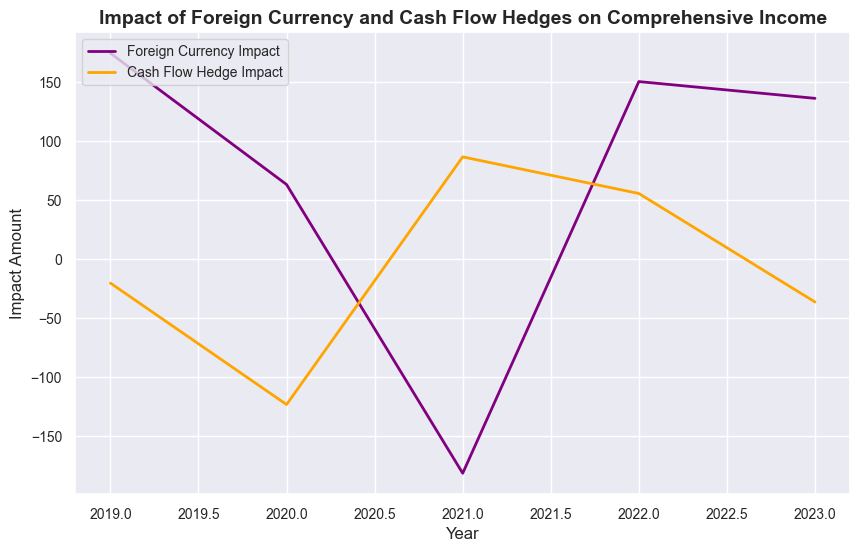

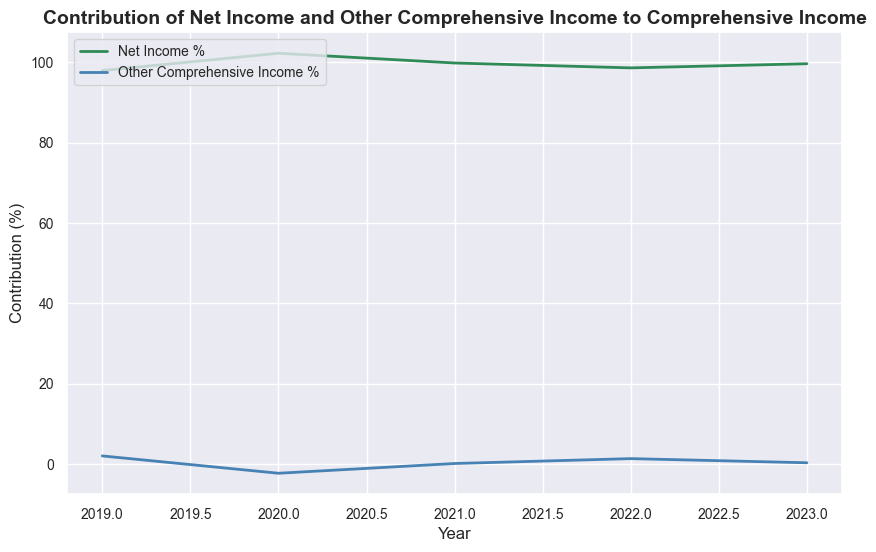

,Year,Net income,"Total other comprehensive income (loss), net of tax",Comprehensive Income,Foreign Currency Impact,Cash Flow Hedge Impact,Net Income %,Other Comprehensive Income %
0,2023,8468.8,30.6,8499.4,136.1,-36.4,99.639975,0.360025
1,2022,6177.4,87.1,6264.5,150.3,55.5,98.609626,1.390374
2,2021,7545.2,13.1,7558.3,-181.5,86.5,99.826681,0.173319
3,2020,4730.5,-104.1,4626.4,63.1,-123.3,102.250130,-2.250130
4,2019,6025.4,126.8,6152.2,174.3,-20.4,97.938949,2.061051


In [5]:
# Step 1: Calculate Comprehensive Income
comprehensive_income['Comprehensive Income'] = comprehensive_income['Net income'] + comprehensive_income['Total other comprehensive income (loss), net of tax']

# Stacked Bar Chart for Comprehensive Income Components
comprehensive_income[['Net income', 'Total other comprehensive income (loss), net of tax']].plot(kind="bar", stacked=True, figsize=(10, 6), color=['#4169e1', '#e9967a'])
plt.title('Contribution of Net Income and Other Comprehensive Income to Comprehensive Income')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(['Net Income', 'Other Comprehensive Income'])
plt.show()

# Line Plot for Net Income, Other Comprehensive Income, and Comprehensive Income Over Time
plt.figure(figsize=(10, 6))
plt.plot(comprehensive_income['Year'], comprehensive_income['Net income'], label='Net Income', color='royalblue', linewidth=2)
plt.plot(comprehensive_income['Year'], comprehensive_income['Total other comprehensive income (loss), net of tax'], label='Total Other Comprehensive Income (Loss)', color='firebrick', linewidth=2)
plt.plot(comprehensive_income['Year'], comprehensive_income['Comprehensive Income'], label='Comprehensive Income', linestyle='--', color='darkgreen', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Net Income, Other Comprehensive Income, and Comprehensive Income Trend', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Step 2: Analyze the Impact of Specific Components on Other Comprehensive Income
# Calculate Foreign Currency and Cash Flow Hedge impacts
comprehensive_income['Foreign Currency Impact'] = comprehensive_income[
    ['Foreign currency translation adjustments - Gain (loss) recognized in AOCI',
     'Foreign currency translation adjustments - Reclassification of (gain) loss to net income']].sum(axis=1)

comprehensive_income['Cash Flow Hedge Impact'] = comprehensive_income[
    ['Cash flow hedges - Gain (loss) recognized in AOCI',
     'Cash flow hedges - Reclassification of (gain) loss to net income']].sum(axis=1)

# Line Plot for Foreign Currency and Cash Flow Hedge Impacts on Comprehensive Income
plt.figure(figsize=(10, 6))
plt.plot(comprehensive_income['Year'], comprehensive_income['Foreign Currency Impact'], label='Foreign Currency Impact', color='purple', linewidth=2)
plt.plot(comprehensive_income['Year'], comprehensive_income['Cash Flow Hedge Impact'], label='Cash Flow Hedge Impact', color='orange', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Impact Amount', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Impact of Foreign Currency and Cash Flow Hedges on Comprehensive Income', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Step 3: Contribution Analysis of Comprehensive Income Components
# Calculate the percentage contribution of each component
comprehensive_income['Net Income %'] = (comprehensive_income['Net income'] / comprehensive_income['Comprehensive Income']).fillna(0) * 100
comprehensive_income['Other Comprehensive Income %'] = (comprehensive_income['Total other comprehensive income (loss), net of tax'] / comprehensive_income['Comprehensive Income']).fillna(0) * 100

# Line Plot for Contribution Percentages
plt.figure(figsize=(10, 6))
plt.plot(comprehensive_income['Year'], comprehensive_income['Net Income %'], label='Net Income %', color='seagreen', linewidth=2)
plt.plot(comprehensive_income['Year'], comprehensive_income['Other Comprehensive Income %'], label='Other Comprehensive Income %', color='steelblue', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Contribution (%)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Contribution of Net Income and Other Comprehensive Income to Comprehensive Income', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Display relevant columns for reference
comprehensive_income[['Year', 'Net income', 'Total other comprehensive income (loss), net of tax', 'Comprehensive Income', 
                      'Foreign Currency Impact', 'Cash Flow Hedge Impact', 'Net Income %', 'Other Comprehensive Income %']]


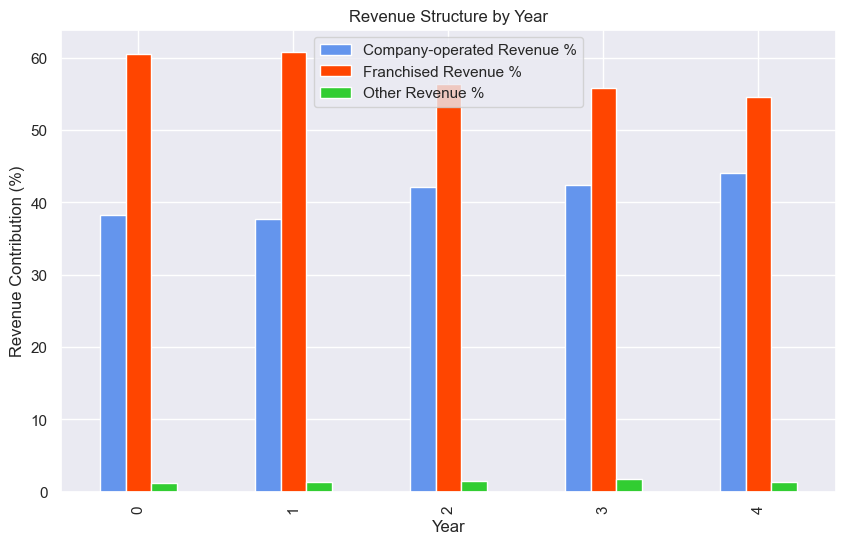

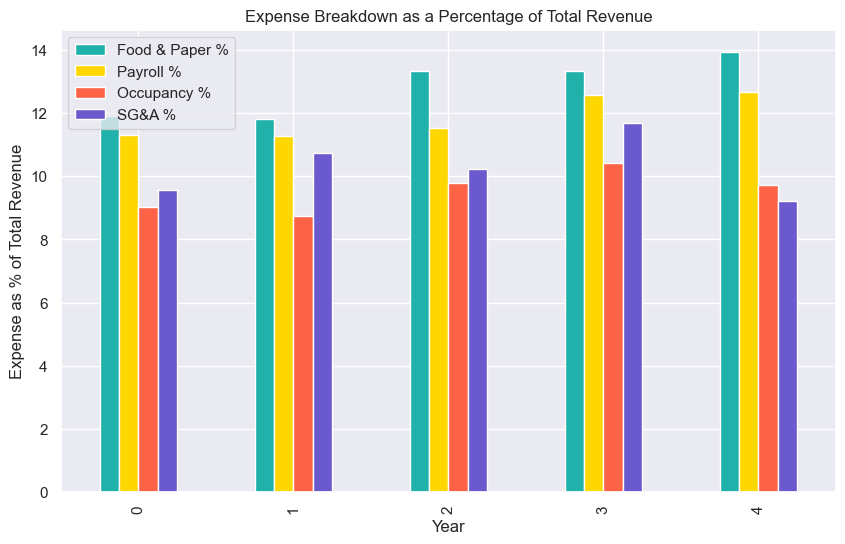

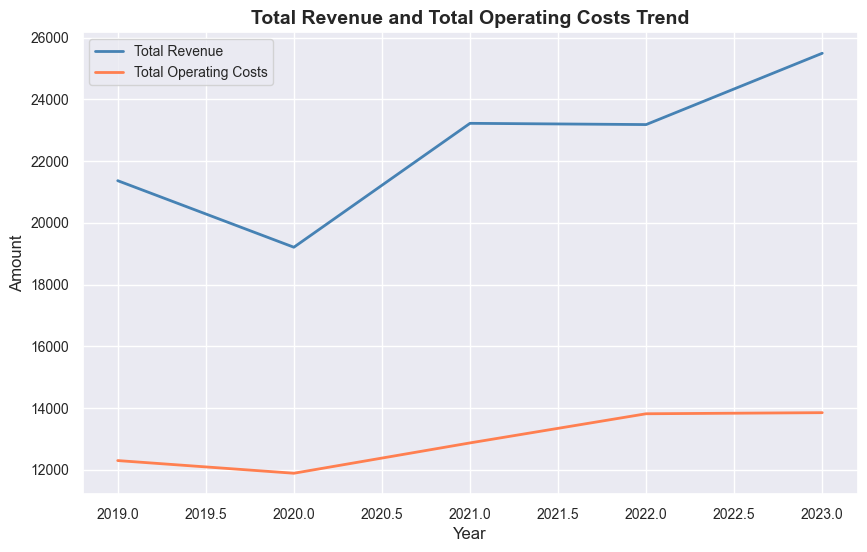

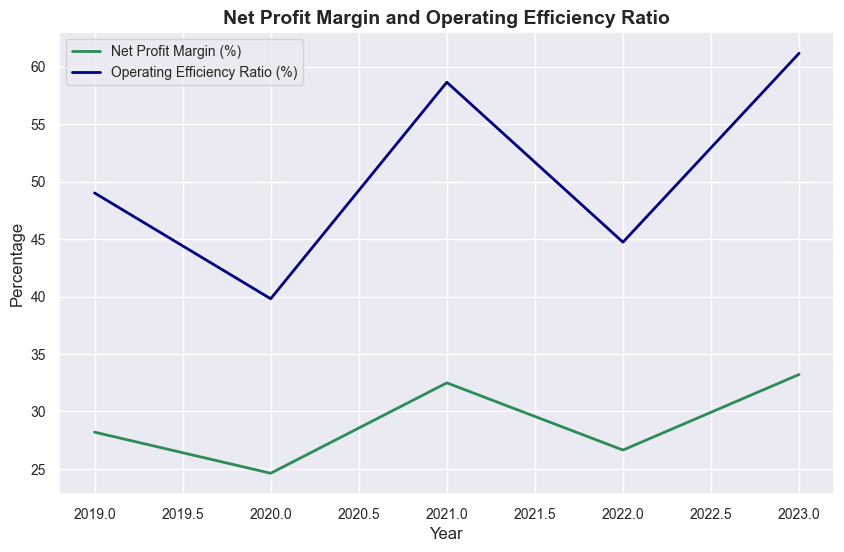

,Year,Total revenues,Sales by Company-operated restaurants,Revenues from franchised restaurants,Other revenues,Food & Paper %,Payroll %,Occupancy %,SG&A %,Net Profit Margin,Operating Efficiency Ratio
0,2023,25493.7,9741.6,15436.5,315.6,11.920592,11.319659,9.019091,9.552164,33.219187,61.159818
1,2022,23182.6,8748.4,14105.8,328.4,11.807563,11.290364,8.740176,10.750304,26.646709,44.726172
2,2021,23222.9,9787.4,13085.4,350.1,13.335113,11.528276,9.789044,10.239031,32.490344,58.640387
3,2020,19207.8,8139.2,10726.1,342.5,13.349785,12.580306,10.415560,11.687960,24.628016,39.806291
4,2019,21364.4,9420.8,11655.7,287.9,13.949842,12.658441,9.716631,9.206437,28.202992,49.008508


In [6]:
# Step 1: Calculate Revenue Structure as a Percentage of Total Revenue
statement_of_income['Company-operated Revenue %'] = (statement_of_income['Sales by Company-operated restaurants'] / statement_of_income['Total revenues']) * 100
statement_of_income['Franchised Revenue %'] = (statement_of_income['Revenues from franchised restaurants'] / statement_of_income['Total revenues']) * 100
statement_of_income['Other Revenue %'] = (statement_of_income['Other revenues'] / statement_of_income['Total revenues']) * 100

# Grouped Bar Chart for Revenue Structure by Year
statement_of_income[['Company-operated Revenue %', 'Franchised Revenue %', 'Other Revenue %']].plot(kind="bar", figsize=(10, 6), color=['#6495ED', '#FF4500', '#32CD32'])
plt.title('Revenue Structure by Year')
plt.xlabel('Year')
plt.ylabel('Revenue Contribution (%)')
plt.legend(['Company-operated Revenue %', 'Franchised Revenue %', 'Other Revenue %'])
plt.show()

# Step 2: Calculate Expense Breakdown as a Percentage of Total Revenue
statement_of_income['Food & Paper %'] = (statement_of_income['Company-operated restaurant expenses - Food & paper'] / statement_of_income['Total revenues']) * 100
statement_of_income['Payroll %'] = (statement_of_income['Company-operated restaurant expenses - Payroll & employee benefits'] / statement_of_income['Total revenues']) * 100
statement_of_income['Occupancy %'] = (statement_of_income['Company-operated restaurant expenses - Occupancy & other operating expenses'] / statement_of_income['Total revenues']) * 100
statement_of_income['SG&A %'] = (statement_of_income['Selling, general & administrative expenses - Other'] / statement_of_income['Total revenues']) * 100

# Grouped Bar Chart for Expense Breakdown
statement_of_income[['Food & Paper %', 'Payroll %', 'Occupancy %', 'SG&A %']].plot(kind="bar", figsize=(10, 6), color=['#20B2AA', '#FFD700', '#FF6347', '#6A5ACD'])
plt.title('Expense Breakdown as a Percentage of Total Revenue')
plt.xlabel('Year')
plt.ylabel('Expense as % of Total Revenue')
plt.legend(['Food & Paper %', 'Payroll %', 'Occupancy %', 'SG&A %'])
plt.show()

# Additional Trend Analysis Visualizations

# Total Revenue and Total Operating Costs Over Time
plt.figure(figsize=(10, 6))
plt.plot(statement_of_income['Year'], statement_of_income['Total revenues'], label='Total Revenue', color='steelblue', linewidth=2)
plt.plot(statement_of_income['Year'], statement_of_income['Total operating costs and expenses'], label='Total Operating Costs', color='coral', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Total Revenue and Total Operating Costs Trend', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Step 3: Operating Efficiency Analysis
# Calculate Net Profit Margin and Operating Efficiency Ratio
statement_of_income['Net Profit Margin'] = (statement_of_income['Net income'] / statement_of_income['Total revenues']) * 100
statement_of_income['Operating Efficiency Ratio'] = (statement_of_income['Net income'] / statement_of_income['Total operating costs and expenses']) * 100

# Line Plot for Net Profit Margin and Operating Efficiency Ratio
plt.figure(figsize=(10, 6))
plt.plot(statement_of_income['Year'], statement_of_income['Net Profit Margin'], label='Net Profit Margin (%)', color='seagreen', linewidth=2)
plt.plot(statement_of_income['Year'], statement_of_income['Operating Efficiency Ratio'], label='Operating Efficiency Ratio (%)', color='navy', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Net Profit Margin and Operating Efficiency Ratio', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Display relevant columns for reference
statement_of_income[['Year', 'Total revenues', 'Sales by Company-operated restaurants', 'Revenues from franchised restaurants', 
                     'Other revenues', 'Food & Paper %', 'Payroll %', 'Occupancy %', 'SG&A %', 'Net Profit Margin', 'Operating Efficiency Ratio']]


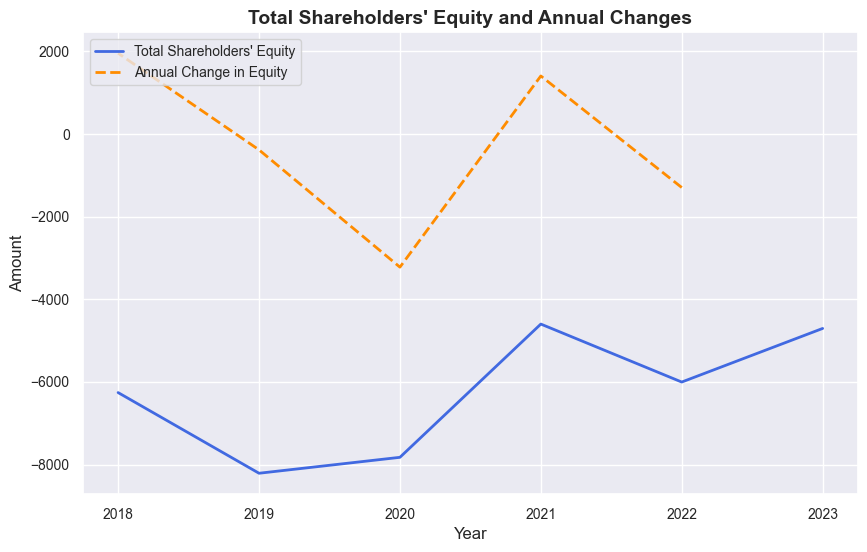

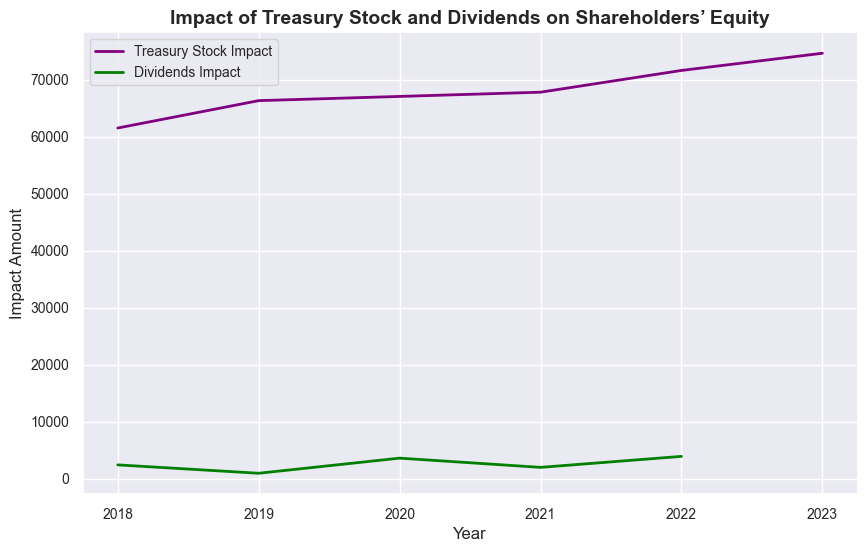

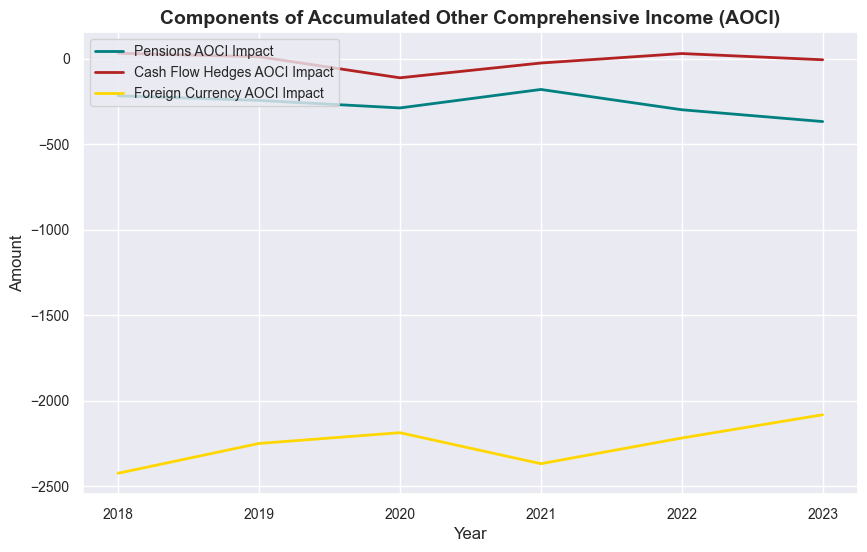

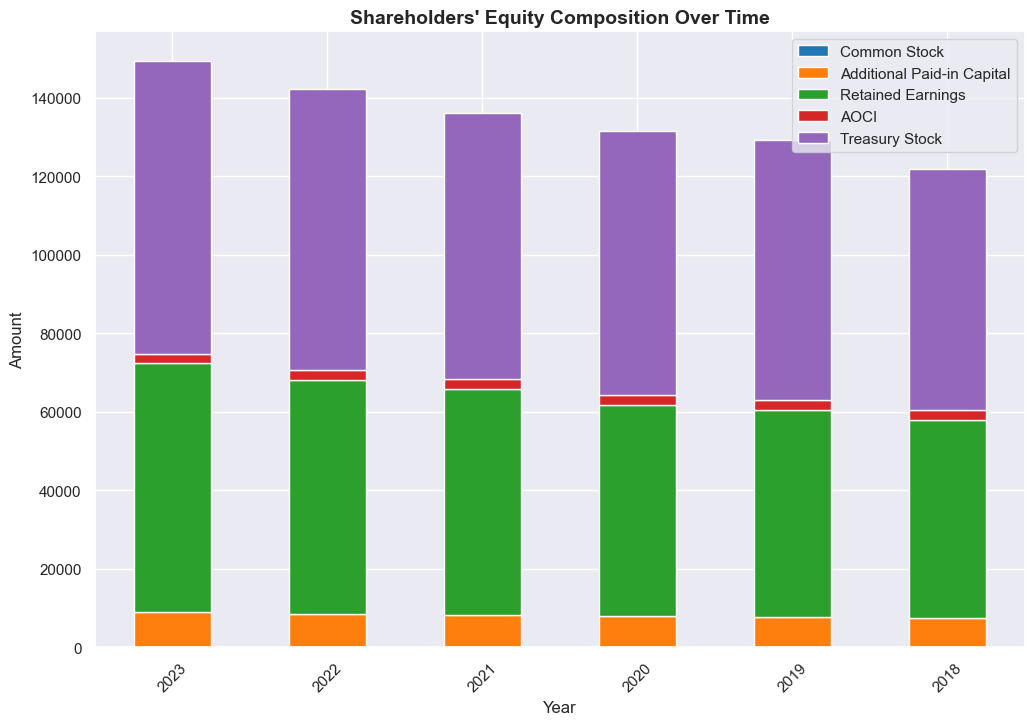

,Year,Total shareholders’ equity (deficit),Equity Change,Treasury Stock Impact,Dividends Impact,Pensions AOCI Impact,Cash Flow Hedges AOCI Impact,Foreign Currency AOCI Impact
0,2023,-4706.7,NaN,74640.1,NaN,-367.3,-5.7,-2083.0
1,2022,-6003.4,-1296.7,71624.4,3936.0,-298.2,30.7,-2219.1
2,2021,-4601.0,1402.4,67810.2,2009.2,-179.5,-24.8,-2369.4
3,2020,-7824.9,-3223.9,67066.4,3626.6,-287.6,-111.3,-2187.9
4,2019,-8210.3,-385.4,66328.6,977.6,-243.7,12.0,-2251.0
5,2018,-6258.4,1951.9,61528.5,2443.5,-216.6,32.4,-2425.3


In [7]:
# Step 1: Calculate Yearly Changes in Shareholders' Equity
shareholders_equity['Equity Change'] = shareholders_equity['Total shareholders’ equity (deficit)'].diff()

# Line Plot for Total Shareholders' Equity and Annual Changes
plt.figure(figsize=(10, 6))
plt.plot(shareholders_equity['Year'], shareholders_equity['Total shareholders’ equity (deficit)'], label="Total Shareholders' Equity", color='royalblue', linewidth=2)
plt.plot(shareholders_equity['Year'], shareholders_equity['Equity Change'], label='Annual Change in Equity', linestyle='--', color='darkorange', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title("Total Shareholders' Equity and Annual Changes", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Step 2: Analysis of Treasury Stock Impact and Dividends on Shareholders' Equity
shareholders_equity['Treasury Stock Impact'] = -shareholders_equity['Common stock in treasury (amount)']
shareholders_equity['Dividends Impact'] = -shareholders_equity['Retained earnings'].diff()

# Line Plot for Treasury Stock Impact and Dividends Impact
plt.figure(figsize=(10, 6))
plt.plot(shareholders_equity['Year'], shareholders_equity['Treasury Stock Impact'], label='Treasury Stock Impact', color='purple', linewidth=2)
plt.plot(shareholders_equity['Year'], shareholders_equity['Dividends Impact'], label='Dividends Impact', color='green', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Impact Amount', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Impact of Treasury Stock and Dividends on Shareholders’ Equity', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Step 3: Analysis of Accumulated Other Comprehensive Income (AOCI) Components
shareholders_equity['Pensions AOCI Impact'] = shareholders_equity['Accumulated other comprehensive income (loss) - Pensions']
shareholders_equity['Cash Flow Hedges AOCI Impact'] = shareholders_equity['Accumulated other comprehensive income (loss) - Cash flow hedges']
shareholders_equity['Foreign Currency AOCI Impact'] = shareholders_equity['Accumulated other comprehensive income (loss) - Foreign currency translation']

# Line Plot for AOCI Components Over Time
plt.figure(figsize=(10, 6))
plt.plot(shareholders_equity['Year'], shareholders_equity['Pensions AOCI Impact'], label='Pensions AOCI Impact', color='teal', linewidth=2)
plt.plot(shareholders_equity['Year'], shareholders_equity['Cash Flow Hedges AOCI Impact'], label='Cash Flow Hedges AOCI Impact', color='firebrick', linewidth=2)
plt.plot(shareholders_equity['Year'], shareholders_equity['Foreign Currency AOCI Impact'], label='Foreign Currency AOCI Impact', color='gold', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Components of Accumulated Other Comprehensive Income (AOCI)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Step 4: Shareholders' Equity Composition Analysis using Stacked Bar Chart
# Prepare data for stacked bar chart
equity_components_df = shareholders_equity[['Year', 'Common stock (amount)', 'Additional paid-in capital', 'Retained earnings']].copy()
equity_components_df['Accumulated Other Comprehensive Income (Loss)'] = (
    shareholders_equity['Accumulated other comprehensive income (loss) - Pensions'] +
    shareholders_equity['Accumulated other comprehensive income (loss) - Cash flow hedges'] +
    shareholders_equity['Accumulated other comprehensive income (loss) - Foreign currency translation']
)
equity_components_df['Treasury Stock Amount'] = shareholders_equity['Common stock in treasury (amount)']

# Take absolute values for easier interpretation in stacked bar chart
equity_components_df = equity_components_df.set_index('Year').abs()

# Plot stacked bar chart
equity_components_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title("Shareholders' Equity Composition Over Time", fontsize=14, fontweight='bold')
plt.legend(['Common Stock', 'Additional Paid-in Capital', 'Retained Earnings', 'AOCI', 'Treasury Stock'])
plt.xticks(rotation=45)
plt.show()

# Display relevant columns for reference
shareholders_equity[['Year', 'Total shareholders’ equity (deficit)', 'Equity Change', 'Treasury Stock Impact', 'Dividends Impact', 
                     'Pensions AOCI Impact', 'Cash Flow Hedges AOCI Impact', 'Foreign Currency AOCI Impact']]


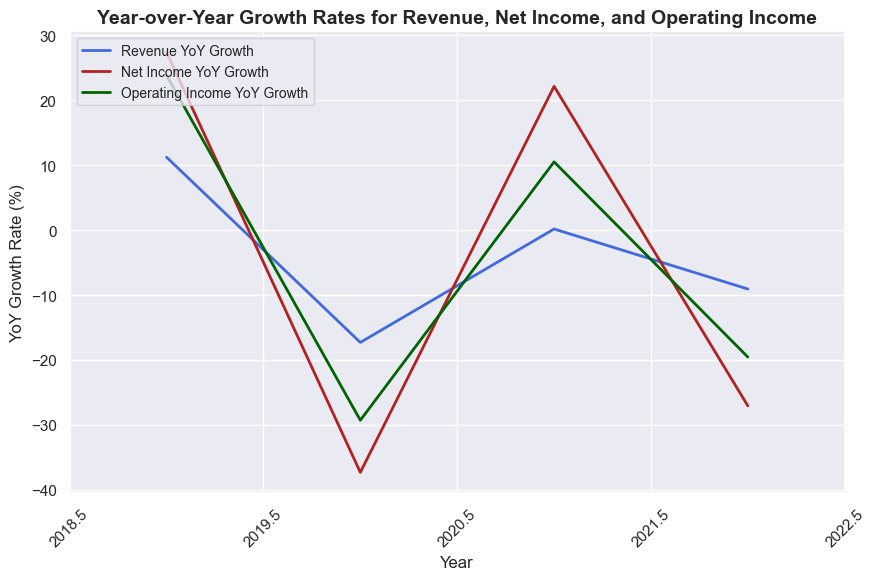

CAGR for Revenue: -4.32%
CAGR for Net Income: -8.16%
CAGR for Operating Income: -6.06%


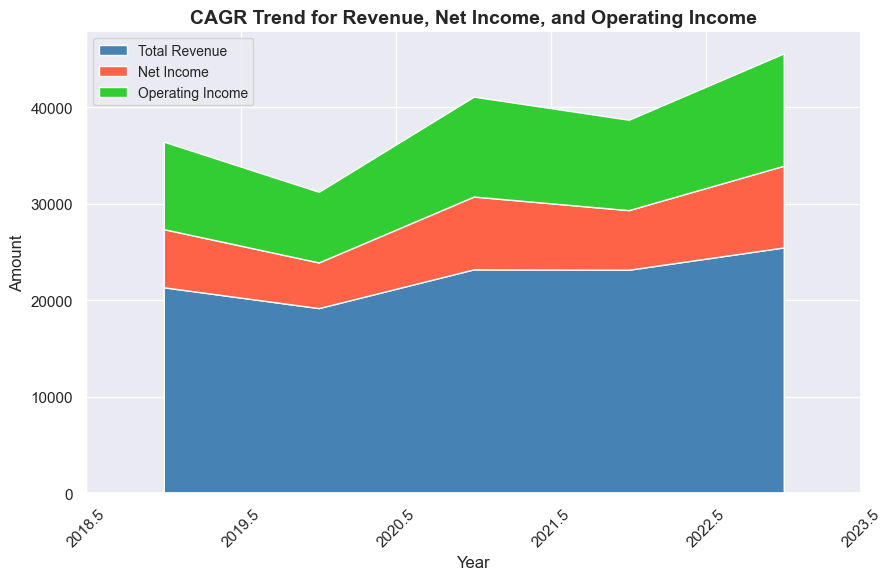

,Year,Total revenues,Net income,Operating income,Revenue YoY Growth,Net Income YoY Growth,Operating Income YoY Growth
0,2023,25493.7,8468.8,11646.7,NaN,NaN,NaN
1,2022,23182.6,6177.4,9371.0,-9.065377,-27.056962,-19.539440
2,2021,23222.9,7545.2,10356.0,0.173837,22.142001,10.511151
3,2020,19207.8,4730.5,7324.0,-17.289400,-37.304511,-29.277713
4,2019,21364.4,6025.4,9069.8,11.227730,27.373428,23.836701


In [8]:
# Step 1: Year-over-Year (YoY) Growth Rate Calculation
# Calculate YoY growth for Total Revenue, Net Income, and Operating Income
statement_of_income['Revenue YoY Growth'] = statement_of_income['Total revenues'].pct_change() * 100
statement_of_income['Net Income YoY Growth'] = statement_of_income['Net income'].pct_change() * 100
statement_of_income['Operating Income YoY Growth'] = statement_of_income['Operating income'].pct_change() * 100

# Plot YoY Growth Rates
plt.figure(figsize=(10, 6))  # Adjust plot size
plt.plot(statement_of_income['Year'], statement_of_income['Revenue YoY Growth'], label='Revenue YoY Growth', color='royalblue', linewidth=2)
plt.plot(statement_of_income['Year'], statement_of_income['Net Income YoY Growth'], label='Net Income YoY Growth', color='firebrick', linewidth=2)
plt.plot(statement_of_income['Year'], statement_of_income['Operating Income YoY Growth'], label='Operating Income YoY Growth', color='darkgreen', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('YoY Growth Rate (%)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('Year-over-Year Growth Rates for Revenue, Net Income, and Operating Income', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.xticks(ticks=plt.xticks()[0][::2])  # Show every other label for clarity
plt.show()

# Step 2: Compound Annual Growth Rate (CAGR) Calculation
# Define a function to calculate CAGR
def calculate_cagr(end_value, start_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate CAGR over the time period available in the dataset
start_year = statement_of_income['Year'].min()
end_year = statement_of_income['Year'].max()
years_diff = end_year - start_year

cagr_revenue = calculate_cagr(statement_of_income['Total revenues'].iloc[-1], statement_of_income['Total revenues'].iloc[0], years_diff)
cagr_net_income = calculate_cagr(statement_of_income['Net income'].iloc[-1], statement_of_income['Net income'].iloc[0], years_diff)
cagr_operating_income = calculate_cagr(statement_of_income['Operating income'].iloc[-1], statement_of_income['Operating income'].iloc[0], years_diff)

# Display CAGR results
print(f"CAGR for Revenue: {cagr_revenue:.2f}%")
print(f"CAGR for Net Income: {cagr_net_income:.2f}%")
print(f"CAGR for Operating Income: {cagr_operating_income:.2f}%")

# Cumulative Growth Curve for Revenue, Net Income, and Operating Income
plt.figure(figsize=(10, 6))  # Adjust plot size
plt.stackplot(statement_of_income['Year'], 
              statement_of_income['Total revenues'], 
              statement_of_income['Net income'], 
              statement_of_income['Operating income'], 
              labels=['Total Revenue', 'Net Income', 'Operating Income'], 
              colors=['#4682B4', '#FF6347', '#32CD32'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.title('CAGR Trend for Revenue, Net Income, and Operating Income', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.xticks(ticks=plt.xticks()[0][::2])  # Show every other label for clarity
plt.show()

# Display key growth metrics for review
statement_of_income[['Year', 'Total revenues', 'Net income', 'Operating income', 
                     'Revenue YoY Growth', 'Net Income YoY Growth', 'Operating Income YoY Growth']]


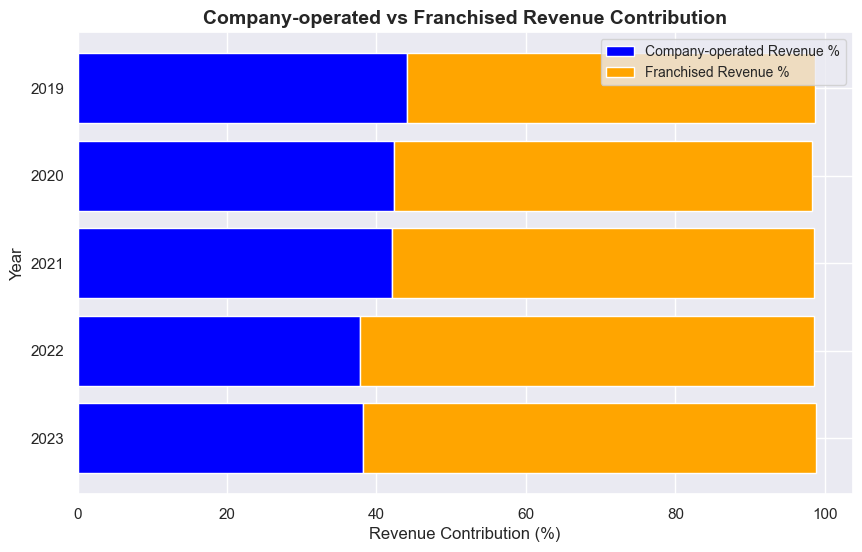

/var/folders/d1/s2qxz98s235glk3wmsk815zc0000gn/T/ipykernel_2831/1646189867.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([statement_of_income['Company-operated Net Profit Margin'].dropna(),


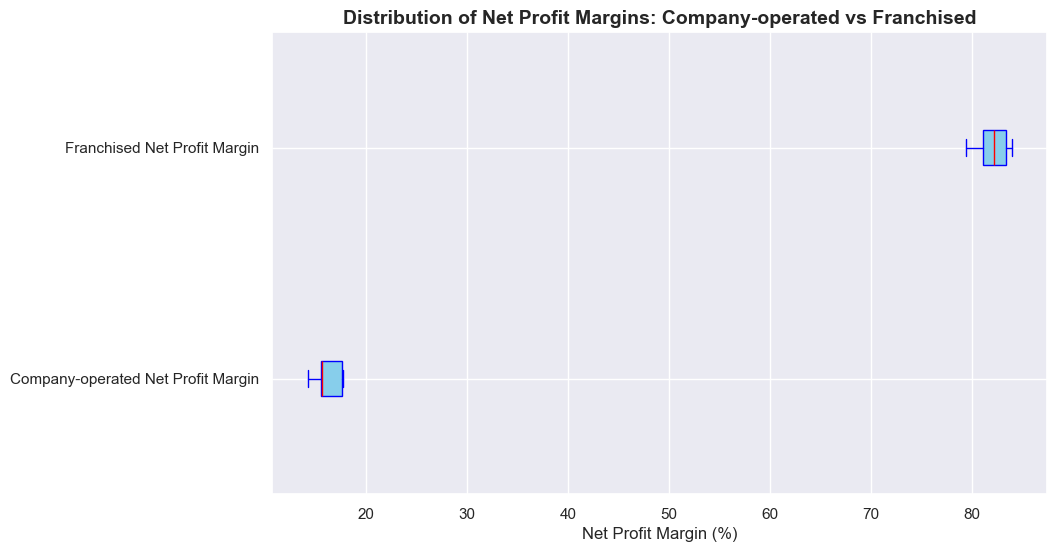

,Year,Sales by Company-operated restaurants,Revenues from franchised restaurants,Company-operated Revenue %,Franchised Revenue %,Company-operated Net Profit Margin,Franchised Net Profit Margin
0,2023,9741.6,15436.5,38.211794,60.550254,15.577523,83.969164
1,2022,8748.4,14105.8,37.736923,60.846497,15.631430,83.342313
2,2021,9787.4,13085.4,42.145468,56.346968,17.778981,82.155685
3,2020,8139.2,10726.1,42.374452,55.842418,14.227443,79.419360
4,2019,9420.8,11655.7,44.095786,54.556646,17.622707,81.119967


In [9]:
# Step 1: Calculate Revenue Contribution from Company-operated and Franchised Restaurants
statement_of_income['Company-operated Revenue %'] = (statement_of_income['Sales by Company-operated restaurants'] / statement_of_income['Total revenues']) * 100
statement_of_income['Franchised Revenue %'] = (statement_of_income['Revenues from franchised restaurants'] / statement_of_income['Total revenues']) * 100

# Step 2: Calculate Net Profit Margins for Each Business Segment
# Assuming 'Company-operated restaurant expenses' and 'Franchised restaurants - Occupancy expenses' represent costs for company-operated and franchised segments respectively.
statement_of_income['Company-operated Net Profit'] = statement_of_income['Sales by Company-operated restaurants'] - (
    statement_of_income['Company-operated restaurant expenses - Food & paper'] +
    statement_of_income['Company-operated restaurant expenses - Payroll & employee benefits'] +
    statement_of_income['Company-operated restaurant expenses - Occupancy & other operating expenses']
)
statement_of_income['Franchised Net Profit'] = statement_of_income['Revenues from franchised restaurants'] - statement_of_income['Franchised restaurants - Occupancy expenses']

# Calculate Net Profit Margin
statement_of_income['Company-operated Net Profit Margin'] = (statement_of_income['Company-operated Net Profit'] / statement_of_income['Sales by Company-operated restaurants']) * 100
statement_of_income['Franchised Net Profit Margin'] = (statement_of_income['Franchised Net Profit'] / statement_of_income['Revenues from franchised restaurants']) * 100

# Visualization
# Horizontal stacked bar chart showing revenue contribution
plt.figure(figsize=(10, 6))
plt.barh(statement_of_income['Year'], statement_of_income['Company-operated Revenue %'], color='blue', label='Company-operated Revenue %')
plt.barh(statement_of_income['Year'], statement_of_income['Franchised Revenue %'], left=statement_of_income['Company-operated Revenue %'], color='orange', label='Franchised Revenue %')
plt.xlabel('Revenue Contribution (%)', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.title('Company-operated vs Franchised Revenue Contribution', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.show()

# Side-by-side boxplot showing net profit margin distribution
plt.figure(figsize=(10, 6))
plt.boxplot([statement_of_income['Company-operated Net Profit Margin'].dropna(), 
             statement_of_income['Franchised Net Profit Margin'].dropna()],
            vert=False, patch_artist=True, labels=['Company-operated Net Profit Margin', 'Franchised Net Profit Margin'],
            boxprops=dict(facecolor='skyblue', color='blue'), whiskerprops=dict(color='blue'), capprops=dict(color='blue'), medianprops=dict(color='red'))
plt.xlabel('Net Profit Margin (%)', fontsize=12)
plt.title('Distribution of Net Profit Margins: Company-operated vs Franchised', fontsize=14, fontweight='bold')
plt.show()

# Display key columns for verification
statement_of_income[['Year', 'Sales by Company-operated restaurants', 'Revenues from franchised restaurants',
                     'Company-operated Revenue %', 'Franchised Revenue %', 
                     'Company-operated Net Profit Margin', 'Franchised Net Profit Margin']]


Multiple table analysis

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for consistent aesthetics
sns.set(style="darkgrid")

balance_sheet = pd.read_csv('/Users/iveshe/Desktop/Data_Visualization/Combined_Consolidated_Balance_Sheet.csv')
cash_flows = pd.read_csv('/Users/iveshe/Desktop/Data_Visualization/Combined_Consolidated_Statement_of_Cash_Flows.csv')
comprehensive_income = pd.read_csv('/Users/iveshe/Desktop/Data_Visualization/Combined_Consolidated_Statement_of_Comprehensive_Income.csv')
statement_of_income = pd.read_csv('/Users/iveshe/Desktop/Data_Visualization/Combined_Consolidated_Statement_of_Income.csv')
shareholders_equity = pd.read_csv('/Users/iveshe/Desktop/Data_Visualization/Combined_Consolidated_Statement_of_Shareholders_Equity.csv')

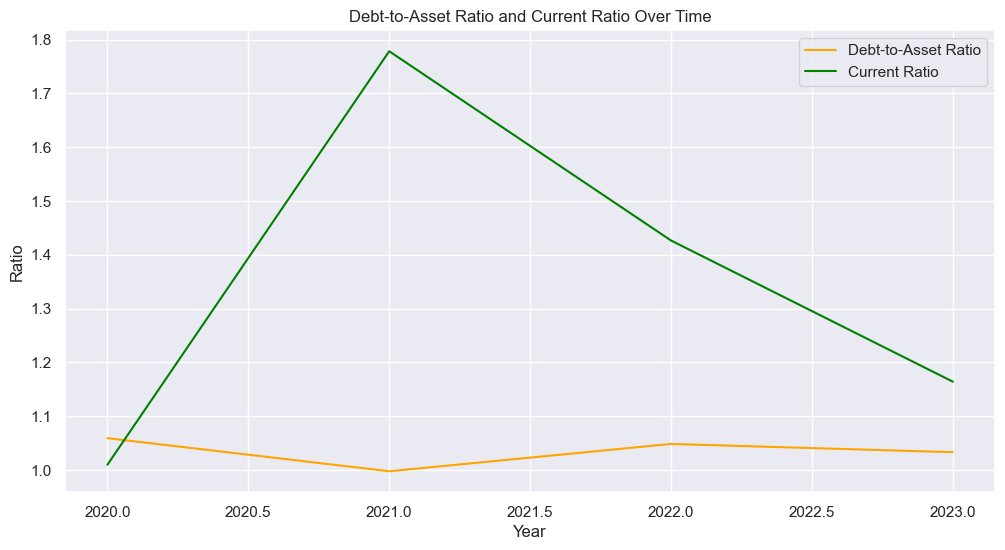

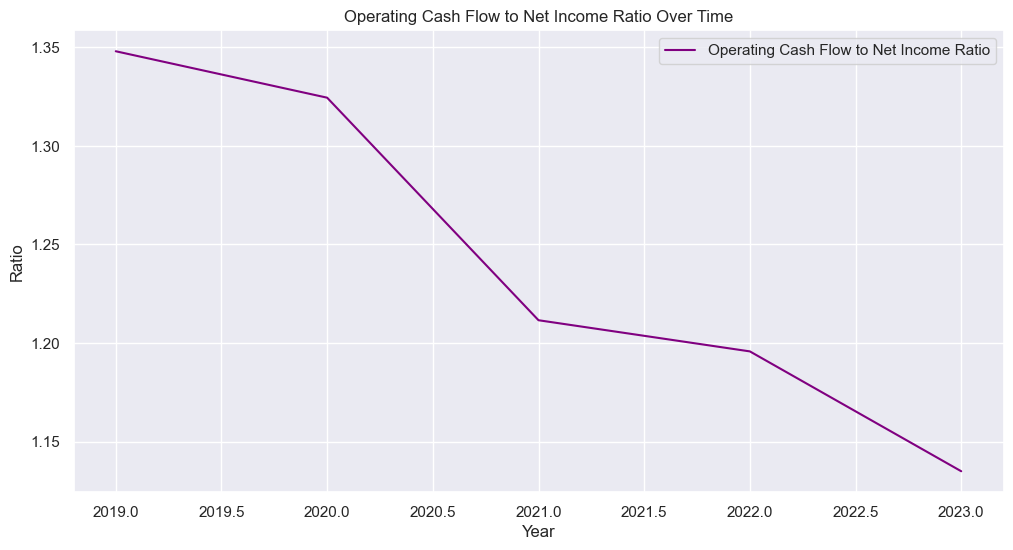

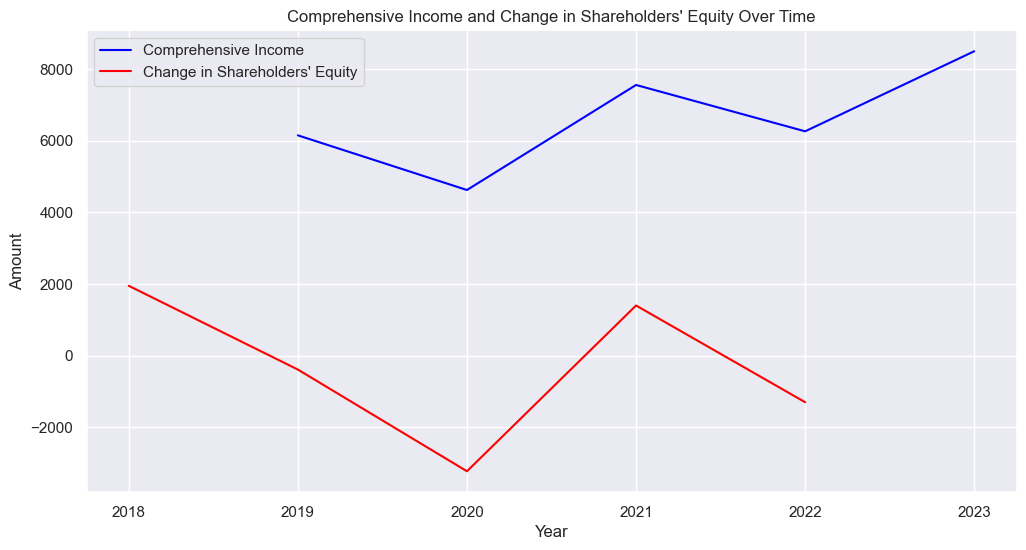

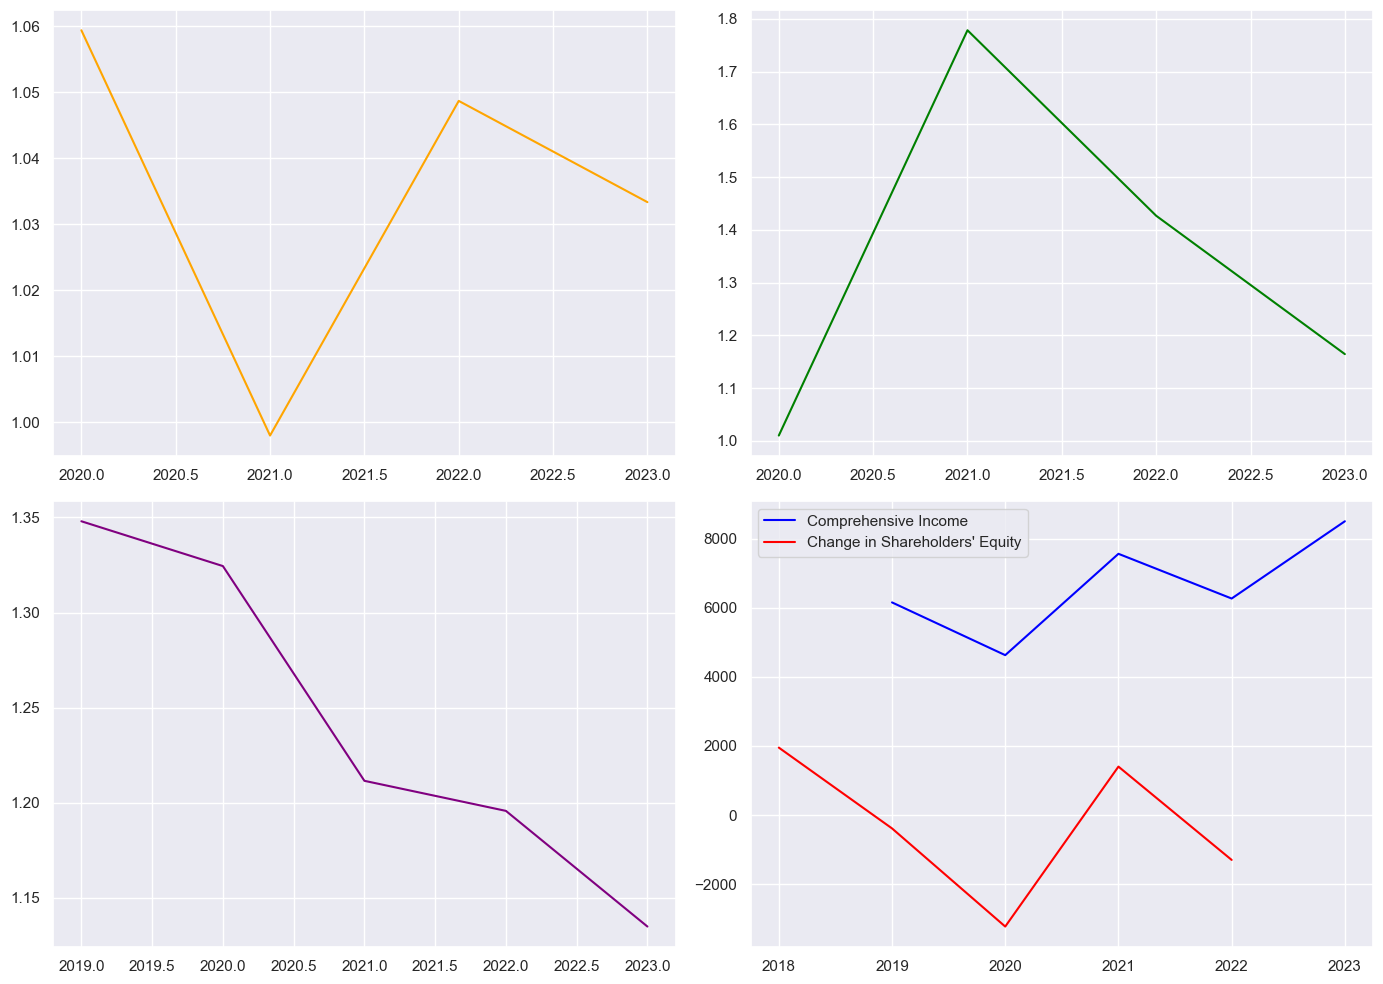

,Year,Total shareholders’ equity (deficit),Change in Shareholders Equity
0,2023,-4706.7,NaN
1,2022,-6003.4,-1296.7
2,2021,-4601.0,1402.4
3,2020,-7824.9,-3223.9
4,2019,-8210.3,-385.4
5,2018,-6258.4,1951.9


In [11]:
# Step 1: Financial Health Analysis - Debt-to-Asset Ratio and Current Ratio
balance_sheet['Total liabilities'] = balance_sheet['Total current liabilities'] + \
                                     balance_sheet['Long-term debt'] + \
                                     balance_sheet['Long-term lease liability'] + \
                                     balance_sheet['Other long-term liabilities']
balance_sheet['Debt-to-Asset Ratio'] = balance_sheet['Total liabilities'] / balance_sheet['Total assets']
balance_sheet['Current Ratio'] = balance_sheet['Total current assets'] / balance_sheet['Total current liabilities']

# Step 2: Profitability Analysis - Operating Cash Flow to Net Income Ratio
cash_flows['Operating Cash Flow to Net Income'] = cash_flows['Cash provided by operations'] / statement_of_income['Net income']

# Step 3: Shareholder Value Analysis - Comprehensive Income and Change in Shareholders' Equity
comprehensive_income['Comprehensive Income'] = comprehensive_income['Net income'] + comprehensive_income['Total other comprehensive income (loss), net of tax']
shareholders_equity['Change in Shareholders Equity'] = shareholders_equity['Total shareholders’ equity (deficit)'].diff()

# Step 4: Visualization
# Debt-to-Asset Ratio and Current Ratio
plt.figure(figsize=(12, 6))
plt.plot(balance_sheet['Year'], balance_sheet['Debt-to-Asset Ratio'], label='Debt-to-Asset Ratio', color='orange')
plt.plot(balance_sheet['Year'], balance_sheet['Current Ratio'], label='Current Ratio', color='green')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend()
plt.title('Debt-to-Asset Ratio and Current Ratio Over Time')
plt.show()

# Operating Cash Flow to Net Income Ratio
plt.figure(figsize=(12, 6))
plt.plot(cash_flows['Year'], cash_flows['Operating Cash Flow to Net Income'], label='Operating Cash Flow to Net Income Ratio', color='purple')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Operating Cash Flow to Net Income Ratio Over Time')
plt.legend()
plt.show()

# Comprehensive Income and Change in Shareholders' Equity
plt.figure(figsize=(12, 6))
plt.plot(comprehensive_income['Year'], comprehensive_income['Comprehensive Income'], label='Comprehensive Income', color='blue')
plt.plot(shareholders_equity['Year'], shareholders_equity['Change in Shareholders Equity'], label="Change in Shareholders' Equity", color='red')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title("Comprehensive Income and Change in Shareholders' Equity Over Time")
plt.legend()
plt.show()

# Combined Trend Analysis for Multiple Metrics
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs[0, 0].plot(balance_sheet['Year'], balance_sheet['Debt-to-Asset Ratio'], color='orange')
axs[0, 1].plot(balance_sheet['Year'], balance_sheet['Current Ratio'], color='green')
axs[1, 0].plot(cash_flows['Year'], cash_flows['Operating Cash Flow to Net Income'], color='purple')
axs[1, 1].plot(comprehensive_income['Year'], comprehensive_income['Comprehensive Income'], color='blue', label='Comprehensive Income')
axs[1, 1].plot(shareholders_equity['Year'], shareholders_equity['Change in Shareholders Equity'], color='red', label="Change in Shareholders' Equity")
axs[1, 1].legend()
plt.tight_layout()
plt.show()

# Display relevant columns for verification
balance_sheet[['Year', 'Total liabilities', 'Total assets', 'Debt-to-Asset Ratio', 'Current Ratio']]
cash_flows[['Year', 'Cash provided by operations', 'Operating Cash Flow to Net Income']]
comprehensive_income[['Year', 'Net income', 'Total other comprehensive income (loss), net of tax', 'Comprehensive Income']]
shareholders_equity[['Year', 'Total shareholders’ equity (deficit)', 'Change in Shareholders Equity']]


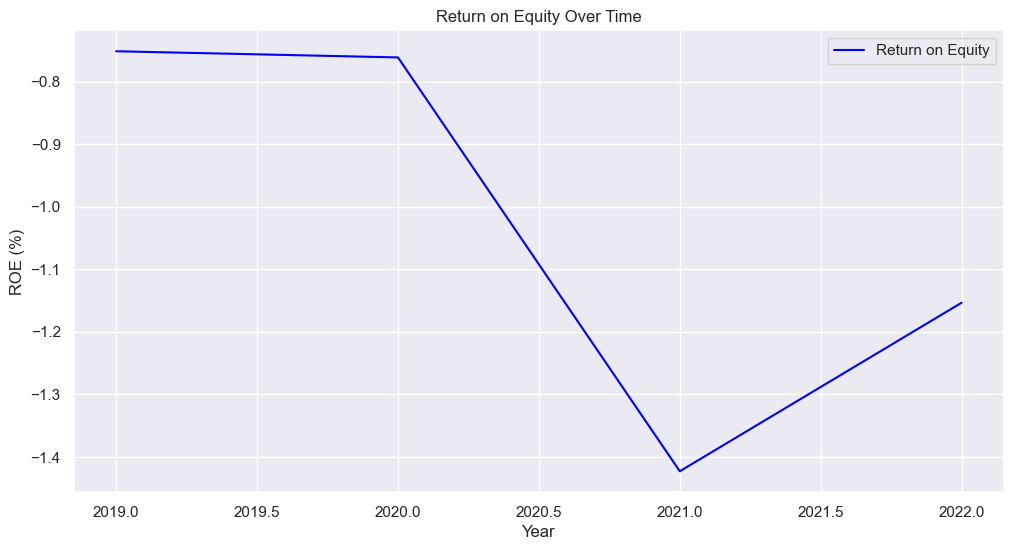

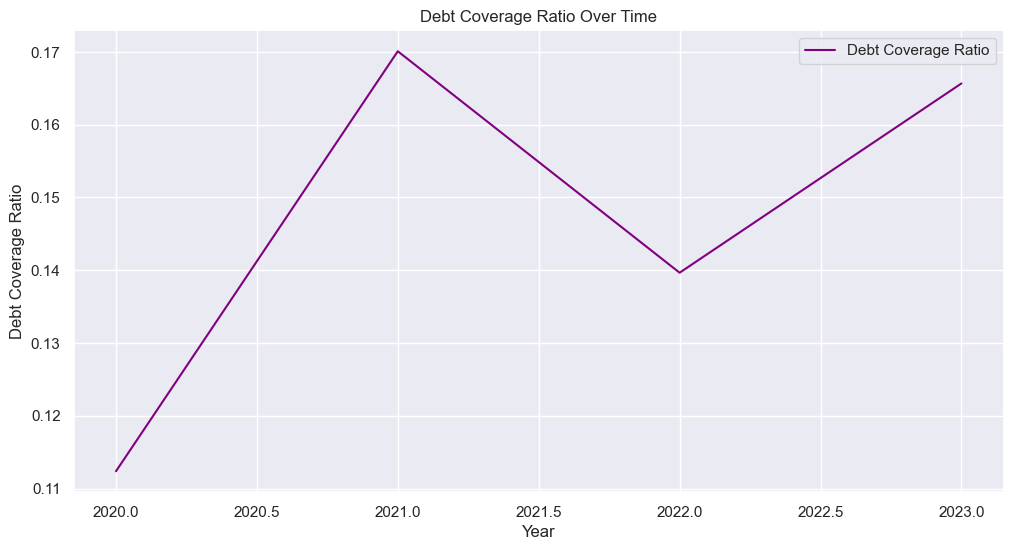

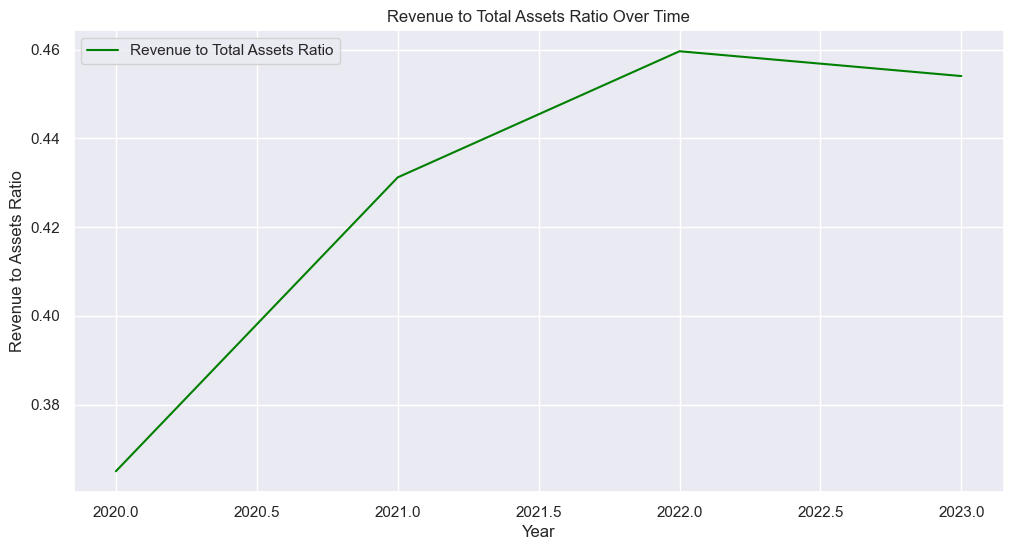

,Year,Total liabilities,Debt Coverage Ratio,Revenue to Total Assets Ratio
0,2023,58019.3,0.165667,0.454054
1,2022,52891.8,0.139657,0.459648
2,2021,53744.6,0.170092,0.431217
3,2020,55753.4,0.112373,0.364981


In [12]:
# Step 1: Return on Equity (ROE) Analysis
shareholders_equity['Avg Shareholders Equity'] = (shareholders_equity['Total shareholders’ equity (deficit)'] + shareholders_equity['Total shareholders’ equity (deficit)'].shift(1)) / 2
statement_of_income['Return on Equity'] = statement_of_income['Net income'] / shareholders_equity['Avg Shareholders Equity']

# Step 2: Debt Coverage Analysis
balance_sheet['Debt Coverage Ratio'] = cash_flows['Cash provided by operations'] / balance_sheet['Total liabilities']

# Step 3: Asset Efficiency - Revenue to Total Assets Ratio
balance_sheet['Revenue to Total Assets Ratio'] = statement_of_income['Total revenues'] / balance_sheet['Total assets']

# Step 4: Visualization
# Return on Equity (ROE)
plt.figure(figsize=(12, 6))
plt.plot(statement_of_income['Year'], statement_of_income['Return on Equity'], label='Return on Equity', color='blue')
plt.xlabel('Year')
plt.ylabel('ROE (%)')
plt.title('Return on Equity Over Time')
plt.legend()
plt.show()

# Debt Coverage Ratio
plt.figure(figsize=(12, 6))
plt.plot(balance_sheet['Year'], balance_sheet['Debt Coverage Ratio'], label='Debt Coverage Ratio', color='purple')
plt.xlabel('Year')
plt.ylabel('Debt Coverage Ratio')
plt.title('Debt Coverage Ratio Over Time')
plt.legend()
plt.show()

# Revenue to Total Assets Ratio
plt.figure(figsize=(12, 6))
plt.plot(balance_sheet['Year'], balance_sheet['Revenue to Total Assets Ratio'], label='Revenue to Total Assets Ratio', color='green')
plt.xlabel('Year')
plt.ylabel('Revenue to Assets Ratio')
plt.title('Revenue to Total Assets Ratio Over Time')
plt.legend()
plt.show()

# Data Verification
shareholders_equity[['Year', 'Total shareholders’ equity (deficit)', 'Avg Shareholders Equity']].head()
statement_of_income[['Year', 'Net income', 'Return on Equity']].head()
balance_sheet[['Year', 'Total liabilities', 'Debt Coverage Ratio', 'Revenue to Total Assets Ratio']].head()


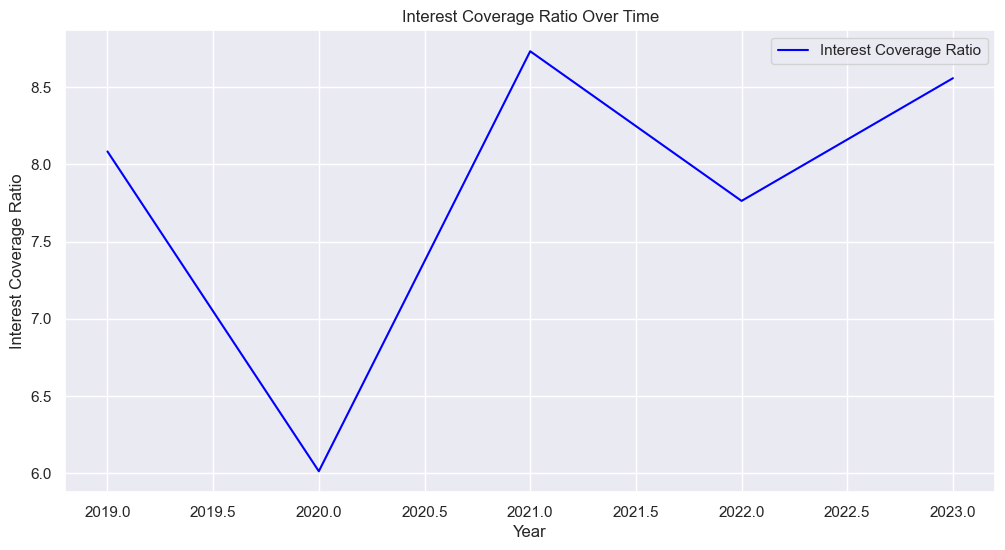

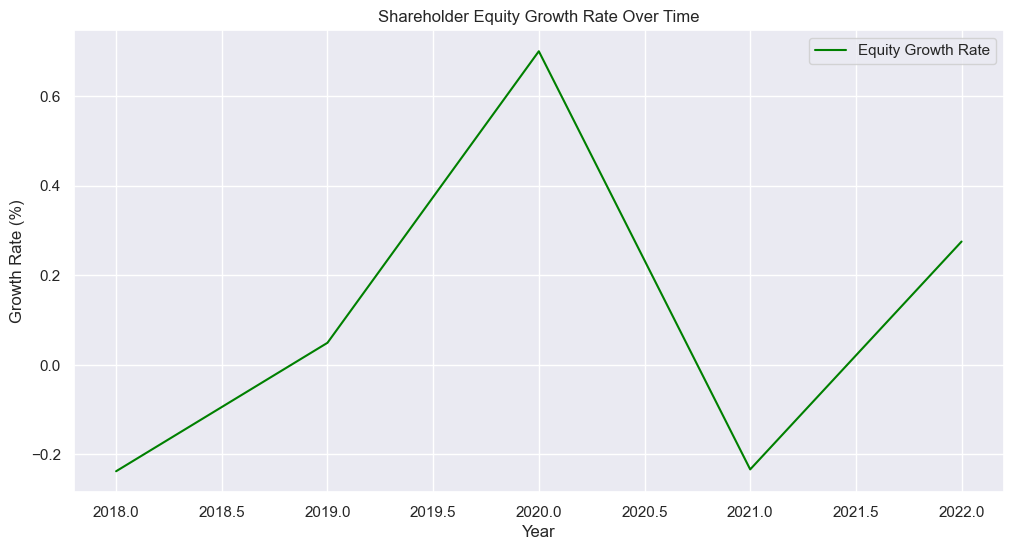

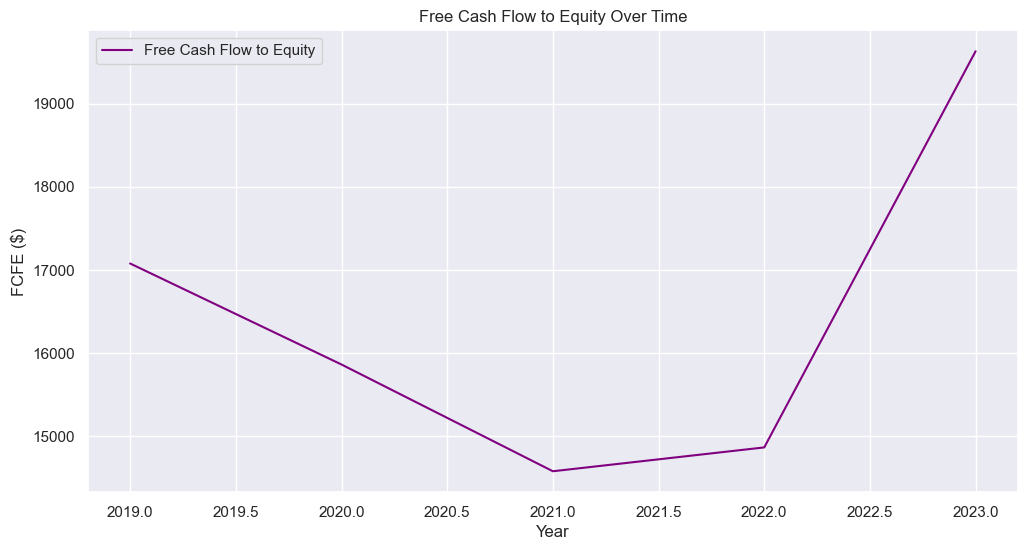

,Year,Cash provided by operations,Capital expenditures,Net Borrowings,FCFE
0,2023,9611.9,-2357.4,7662.2,19631.5
1,2022,7386.7,-1899.2,5576.9,14862.8
2,2021,9141.5,-2040.0,3394.4,14575.9
3,2020,6265.2,-1640.8,7954.7,15860.7
4,2019,8122.1,-2393.7,6560.9,17076.7


In [13]:
# Step 1: Interest Coverage Ratio
statement_of_income['Interest Coverage Ratio'] = statement_of_income['Operating income'] / statement_of_income['Interest expense-net of capitalized interest']

# Step 2: Equity Growth Rate
shareholders_equity['Equity Growth Rate'] = shareholders_equity['Total shareholders’ equity (deficit)'].pct_change()

# Step 3: Free Cash Flow to Equity (FCFE)
cash_flows['Net Borrowings'] = cash_flows['Long-term financing issuances'] - cash_flows['Long-term financing repayments']
cash_flows['FCFE'] = cash_flows['Cash provided by operations'] - cash_flows['Capital expenditures'] + cash_flows['Net Borrowings']

# Step 4: Visualization
# Interest Coverage Ratio
plt.figure(figsize=(12, 6))
plt.plot(statement_of_income['Year'], statement_of_income['Interest Coverage Ratio'], label='Interest Coverage Ratio', color='blue')
plt.xlabel('Year')
plt.ylabel('Interest Coverage Ratio')
plt.title('Interest Coverage Ratio Over Time')
plt.legend()
plt.show()

# Equity Growth Rate
plt.figure(figsize=(12, 6))
plt.plot(shareholders_equity['Year'], shareholders_equity['Equity Growth Rate'], label='Equity Growth Rate', color='green')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Shareholder Equity Growth Rate Over Time')
plt.legend()
plt.show()

# Free Cash Flow to Equity (FCFE)
plt.figure(figsize=(12, 6))
plt.plot(cash_flows['Year'], cash_flows['FCFE'], label='Free Cash Flow to Equity', color='purple')
plt.xlabel('Year')
plt.ylabel('FCFE ($)')
plt.title('Free Cash Flow to Equity Over Time')
plt.legend()
plt.show()

# Data Verification
statement_of_income[['Year', 'Operating income', 'Interest expense-net of capitalized interest', 'Interest Coverage Ratio']]
shareholders_equity[['Year', 'Total shareholders’ equity (deficit)', 'Equity Growth Rate']]
cash_flows[['Year', 'Cash provided by operations', 'Capital expenditures', 'Net Borrowings', 'FCFE']]


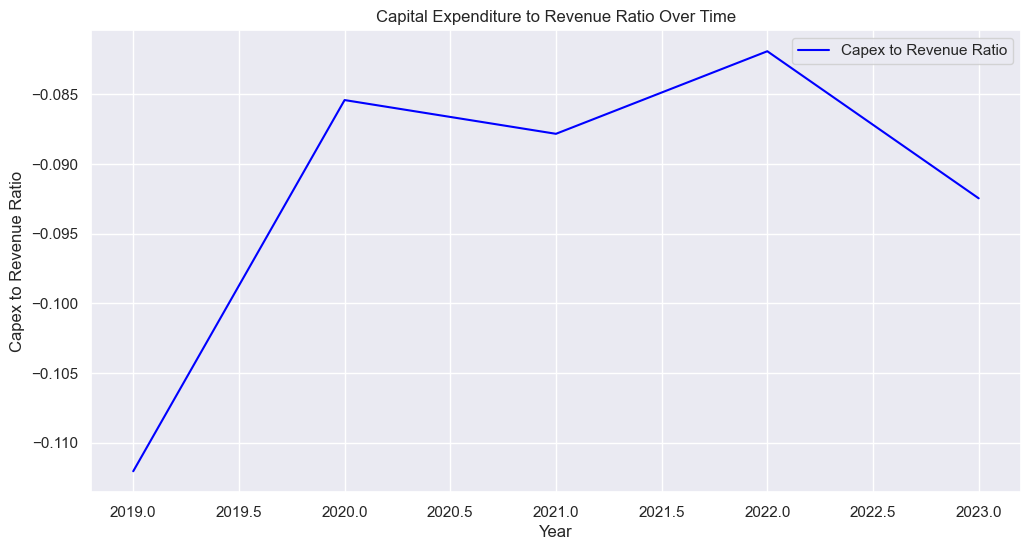

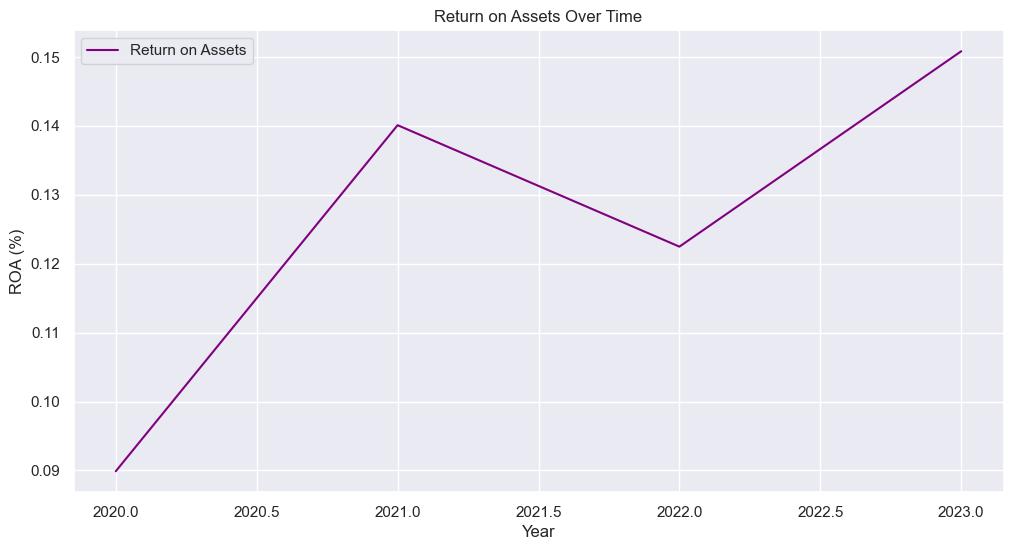

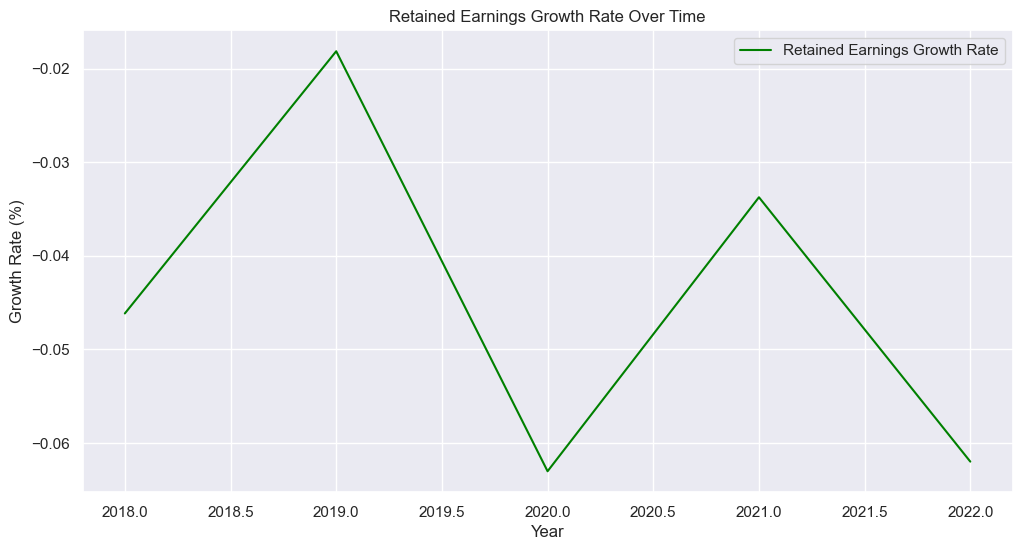

,Year,Retained earnings,Retained Earnings Growth Rate
0,2023,63479.9,NaN
1,2022,59543.9,-0.062004
2,2021,57534.7,-0.033743
3,2020,53908.1,-0.063033
4,2019,52930.5,-0.018135
5,2018,50487.0,-0.046164


In [14]:
# Step 1: Capital Expenditure to Revenue Ratio
statement_of_income['Capex to Revenue Ratio'] = cash_flows['Capital expenditures'] / statement_of_income['Total revenues']

# Step 2: Return on Assets (ROA)
balance_sheet['Return on Assets'] = statement_of_income['Net income'] / balance_sheet['Total assets']

# Step 3: Retained Earnings Growth Rate
shareholders_equity['Retained Earnings Growth Rate'] = shareholders_equity['Retained earnings'].pct_change()

# Capital Expenditure to Revenue Ratio
plt.figure(figsize=(12, 6))
plt.plot(statement_of_income['Year'], statement_of_income['Capex to Revenue Ratio'], label='Capex to Revenue Ratio', color='blue')
plt.xlabel('Year')
plt.ylabel('Capex to Revenue Ratio')
plt.title('Capital Expenditure to Revenue Ratio Over Time')
plt.legend()
plt.show()

# Return on Assets (ROA)
plt.figure(figsize=(12, 6))
plt.plot(balance_sheet['Year'], balance_sheet['Return on Assets'], label='Return on Assets', color='purple')
plt.xlabel('Year')
plt.ylabel('ROA (%)')
plt.title('Return on Assets Over Time')
plt.legend()
plt.show()

# Retained Earnings Growth Rate
plt.figure(figsize=(12, 6))
plt.plot(shareholders_equity['Year'], shareholders_equity['Retained Earnings Growth Rate'], label='Retained Earnings Growth Rate', color='green')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Retained Earnings Growth Rate Over Time')
plt.legend()
plt.show()

# Data Verification
statement_of_income[['Year', 'Total revenues', 'Capex to Revenue Ratio']]
balance_sheet[['Year', 'Total assets', 'Return on Assets']]
shareholders_equity[['Year', 'Retained earnings', 'Retained Earnings Growth Rate']]


In [15]:
# Initialize a dictionary to store forecast results
forecast_results = {}

# Define a function to calculate simple average and moving average forecasts
def simple_and_moving_avg(data, column_name, window=4):
    # Simple average
    simple_avg_forecast = data[column_name].mean()
    # Moving average
    moving_avg_forecast = data[column_name].rolling(window=window).mean().iloc[-1]
    return simple_avg_forecast, moving_avg_forecast

# Calculate simple and moving average forecasts for multiple metrics

# Get total revenue and net income from statement_of_income
simple_avg_revenue, moving_avg_revenue = simple_and_moving_avg(statement_of_income, 'Total revenues')
simple_avg_net_income, moving_avg_net_income = simple_and_moving_avg(statement_of_income, 'Net income')
forecast_results['Total Revenues'] = {'Simple Average': simple_avg_revenue, 'Moving Average': moving_avg_revenue}
forecast_results['Net Income'] = {'Simple Average': simple_avg_net_income, 'Moving Average': moving_avg_net_income}

# Get operating cash flow from cash_flows
simple_avg_operating_cf, moving_avg_operating_cf = simple_and_moving_avg(cash_flows, 'Cash provided by operations')
forecast_results['Operating Cash Flow'] = {'Simple Average': simple_avg_operating_cf, 'Moving Average': moving_avg_operating_cf}

# Get total assets and current liabilities from balance_sheet
simple_avg_assets, moving_avg_assets = simple_and_moving_avg(balance_sheet, 'Total assets')
simple_avg_curr_liabilities, moving_avg_curr_liabilities = simple_and_moving_avg(balance_sheet, 'Total current liabilities')
forecast_results['Total Assets'] = {'Simple Average': simple_avg_assets, 'Moving Average': moving_avg_assets}
forecast_results['Current Liabilities'] = {'Simple Average': simple_avg_curr_liabilities, 'Moving Average': moving_avg_curr_liabilities}

# Get comprehensive income from comprehensive_income
simple_avg_comp_income, moving_avg_comp_income = simple_and_moving_avg(comprehensive_income, 'Net income')
forecast_results['Comprehensive Income'] = {'Simple Average': simple_avg_comp_income, 'Moving Average': moving_avg_comp_income}

# Get shareholders' equity from shareholders_equity
simple_avg_equity, moving_avg_equity = simple_and_moving_avg(shareholders_equity, 'Total shareholders’ equity (deficit)')
forecast_results["Shareholder's Equity"] = {'Simple Average': simple_avg_equity, 'Moving Average': moving_avg_equity}

# Display forecast results
forecast_df = pd.DataFrame(forecast_results).T
forecast_df.columns = ['Simple Average Forecast', 'Moving Average Forecast']

forecast_df


,Simple Average Forecast,Moving Average Forecast
Total Revenues,22494.280,21744.425
Net Income,6589.460,6119.625
Operating Cash Flow,8105.480,7728.875
Total Assets,53265.875,53265.875
Current Liabilities,5215.575,5215.575
Comprehensive Income,6589.460,6119.625
Shareholder's Equity,-6267.450,-6723.650
